In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import resample


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans


from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc,  recall_score, accuracy_score, precision_score, confusion_matrix,average_precision_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV




# Data Dictionary
1. **Report Number**: Unique identifier for the crash report.
2. **Local Case Number**: Local case identifier for the crash report.
3. **Agency Name**: Name of the agency reporting the crash.
4. **ACRS Report Type**: Type of report generated by the Automated Crash Reporting System.
5. **Crash Date/Time**: Date and time when the crash occurred.
6. **Route Type**: Type of route where the crash occurred (e.g., highway, local road).
7. **Road Name**: Name of the road where the crash occurred.
8. **Cross-Street Type**: Type of the intersecting street.
9. **Cross-Street Name**: Name of the intersecting street.
10. **Off-Road Description**: Description of the location if the crash occurred off-road.
11. **Municipality**: Municipality where the crash occurred.
12. **Related Non-Motorist**: Information about non-motorists involved in the crash.
13. **Collision Type**: Type of collision (e.g., rear-end, head-on).
14. **Weather**: Weather conditions at the time of the crash.
15. **Surface Condition**: Road surface conditions at the time of the crash.
16. **Light**: Lighting conditions at the time of the crash.
17. **Traffic Control**: Type of traffic control at the crash location (e.g., traffic signal, stop sign).
18. **Driver Substance Abuse**: Information about substance abuse by the driver.
19. **Non-Motorist Substance Abuse**: Information about substance abuse by non-motorists involved.
20. **Person ID**: Unique identifier for individuals involved in the crash.
21. **Driver At Fault**: Indicates whether the driver was at fault.
22. **Injury Severity**: Severity of injuries sustained in the crash.
23. **Circumstance**: Circumstances surrounding the crash.
24. **Driver Distracted By**: Factors distracting the driver at the time of the crash.
25. **Drivers License State**: State where the driver's license was issued.
26. **Vehicle ID**: Unique identifier for vehicles involved in the crash.
27. **Vehicle Damage Extent**: Extent of damage to the vehicle.
28. **Vehicle First Impact Location**: Location on the vehicle where the first impact occurred.
29. **Vehicle Second Impact Location**: Location on the vehicle where the second impact occurred (if applicable).
30. **Vehicle Body Type**: Type of vehicle body (e.g., sedan, SUV).
31. **Vehicle Movement**: Movement of the vehicle at the time of the crash.
32. **Vehicle Continuing Dir**: Direction in which the vehicle was continuing after the crash.
33. **Vehicle Going Dir**: Direction in which the vehicle was going at the time of the crash.
34. **Speed Limit**: Posted speed limit at the crash location.
35. **Driverless Vehicle**: Indicates whether the vehicle was driverless (self-driving).
36. **Parked Vehicle**: Indicates whether the vehicle was parked at the time of the crash.
37. **Vehicle Year**: Year of manufacture of the vehicle.
38. **Vehicle Make**: Make or manufacturer of the vehicle.
39. **Vehicle Model**: Model of the vehicle.
40. **Equipment Problems**: Any equipment problems reported for the vehicle.
41. **Latitude**: Latitude coordinates of the crash location.
42. **Longitude**: Longitude coordinates of the crash location.
43. **Location**: Description or address of the crash location.


In [17]:
df=pd.read_csv('/Users/Abdul/Desktop/MMA/Data Mining/Crash_Reporting_-_Drivers_Data.csv',parse_dates=['Crash Date/Time'])
df.sample(10)

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/819995466.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/Users/Abdul/Desktop/MMA/Data Mining/Crash_Reporting_-_Drivers_Data.csv',parse_dates=['Crash Date/Time'])
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/819995466.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/Users/Abdul/Desktop/MMA/Data Mining/Crash_Reporting_-_Drivers_Data.csv',parse_dates=['Crash Date/Time'])


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
98096,MCP2776001Q,17008165,Montgomery County Police,Property Damage Crash,2017-02-15 01:09:00,County,NORBECK RD,Maryland (State),LAYHILL RD,NaN,...,40,No,No,2014,TOYOTA,PRIUS,NO MISUSE,39.120552,-77.033787,"(39.12055164, -77.03378722)"
19275,MCP3337000X,220054823,Montgomery County Police,Property Damage Crash,2022-12-11 18:20:00,Maryland (State),GEORGIA AVE,Maryland (State),FOREST GLEN RD,NaN,...,30,Unknown,No,2017,TOYTOTA,COROLLA,UNKNOWN,39.058339,-77.047941,"(39.058339, -77.04794083)"
96390,MCP29640045,190044382,Montgomery County Police,Property Damage Crash,2019-09-16 16:09:00,County,WARFIELD RD,County,DORSEY RD,NaN,...,40,No,No,2008,THOMAS,BUS,NO MISUSE,39.201982,-77.141062,"(39.20198165, -77.14106246)"
90567,MCP1151008X,190002310,Montgomery County Police,Injury Crash,2019-01-15 15:20:00,Maryland (State),CLOPPER RD,County,WARING STATION RD,NaN,...,40,No,No,2017,TOYT,RAV4,NO MISUSE,39.154195,-77.254247,"(39.15419517, -77.25424733)"
79380,MCP28240011,15003064,Montgomery County Police,Injury Crash,2015-01-19 19:50:00,Maryland (State),DARNESTOWN RD,County,TURKEY FOOT RD,NaN,...,35,No,No,2011,ECLIPSE,2DR,NaN,39.104260,-77.286234,"(39.10426, -77.286234)"
50478,DD5593001Q,15063046,ROCKVILLE,Injury Crash,2015-12-10 08:20:00,Maryland (State),E JEFFERSON ST,Municipality,MARYLAND AVE,NaN,...,30,No,No,2015,CHEVY,SILVERADO,NO MISUSE,39.082883,-77.151537,"(39.08288333, -77.15153667)"
31323,MCP3274001M,230007395,Montgomery County Police,Property Damage Crash,2023-02-13 21:30:00,County,BOILING BROOK PKWY,County,HUNTERS LA,NaN,...,25,No,No,2017,JEEP,TK,NO MISUSE,39.048014,-77.100373,"(39.048014, -77.10037317)"
57647,MCP2895001L,180006806,Montgomery County Police,Property Damage Crash,2018-02-04 23:00:00,County,MIDDLEBROOK RD,County,WARING STATION RD,NaN,...,40,No,No,2014,DODGE,4S,NaN,39.175190,-77.253988,"(39.17519, -77.25398833)"
96433,MCP30450041,210036009,Montgomery County Police,Injury Crash,2021-09-13 12:05:00,Maryland (State),RIVER RD,Government,LITTLE FALLS PKWY,NaN,...,35,No,No,2019,LEXUS,RX 450,NO MISUSE,38.963194,-77.101422,"(38.9631936, -77.10142191)"
19412,MCP2539000S,16058307,Montgomery County Police,Property Damage Crash,2016-11-12 02:29:00,County,CORDELL AVE,County,WOODMONT AVE,NaN,...,25,No,No,2016,TOYOTA,CAMRY,NO MISUSE,38.990965,-77.096437,"(38.990965, -77.09643667)"


In [18]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [19]:
df.isna().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16424
Road Name                          15456
Cross-Street Type                  16455
Cross-Street Name                  15467
Off-Road Description              151083
Municipality                      148079
Related Non-Motorist              161260
Collision Type                       566
Weather                            12946
Surface Condition                  19513
Light                               1380
Traffic Control                    24773
Driver Substance Abuse             30345
Non-Motorist Substance Abuse      162367
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      136179
Driver Distracted By                   0
Drivers License 

In [20]:
# dropping identifier and location columns 
df.drop(['Report Number', 'Local Case Number', 'Person ID', 'Vehicle ID','Agency Name','Location'],axis=1,inplace=True)

In [21]:
# dropping columns with high number of missing values
cols_to_drop = ['Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse']
df = df.drop(columns=cols_to_drop)


In [22]:
df.isna().sum()

ACRS Report Type                      0
Crash Date/Time                       0
Route Type                        16424
Road Name                         15456
Cross-Street Type                 16455
Cross-Street Name                 15467
Collision Type                      566
Weather                           12946
Surface Condition                 19513
Light                              1380
Traffic Control                   24773
Driver Substance Abuse            30345
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By                  0
Drivers License State              9508
Vehicle Damage Extent               302
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  2546
Vehicle Movement                    367
Vehicle Continuing Dir             2585
Vehicle Going Dir                  2585
Speed Limit                           0
Driverless Vehicle                    0


## Handling Missing Values
- We dropped the following columns because they have too many missing values: 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse'
- For the remaining missing values, we dropped the rows with missing values and assessed data loss afterwards; however, we stored the resulting dataframe separately.
- We decided to drop the rows because we have many observations in the dataset
- All Eda was done using the original dataframe, while modelling was done using the cleaned dataframe.


In [23]:
df2=df.dropna()
df2.shape


(81860, 32)

In [24]:
df2['Injury Severity'].value_counts()

Injury Severity
NO APPARENT INJURY          64839
POSSIBLE INJURY              9731
SUSPECTED MINOR INJURY       6510
SUSPECTED SERIOUS INJURY      719
FATAL INJURY                   61
Name: count, dtype: int64

In [25]:
df['Injury Severity'].value_counts()

Injury Severity
NO APPARENT INJURY          136509
POSSIBLE INJURY              16933
SUSPECTED MINOR INJURY       11567
SUSPECTED SERIOUS INJURY      1378
FATAL INJURY                   150
Name: count, dtype: int64

In [26]:
df['ACRS Report Type'].value_counts()

ACRS Report Type
Property Damage Crash    105686
Injury Crash              60436
Fatal Crash                 415
Name: count, dtype: int64

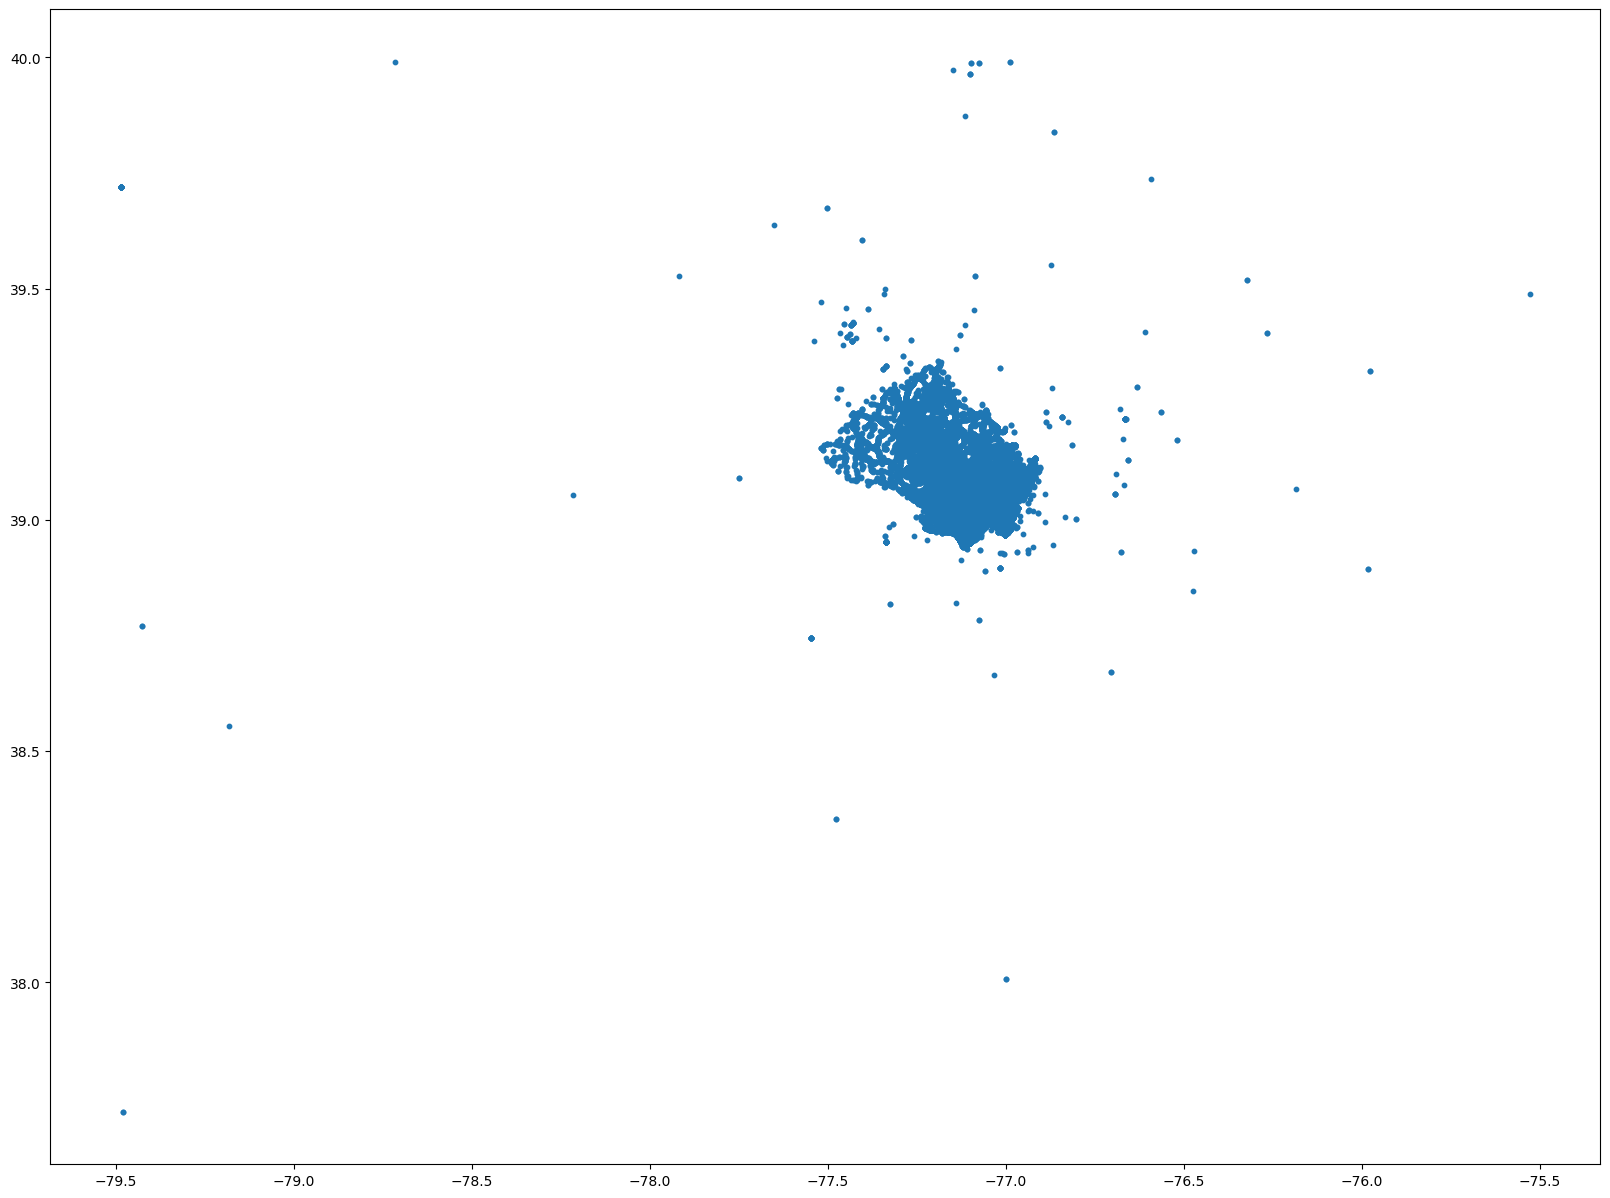

In [27]:
plt.figure(figsize=(20, 15))

plt.scatter (df['Longitude'],
             df['Latitude'],
             s=10);

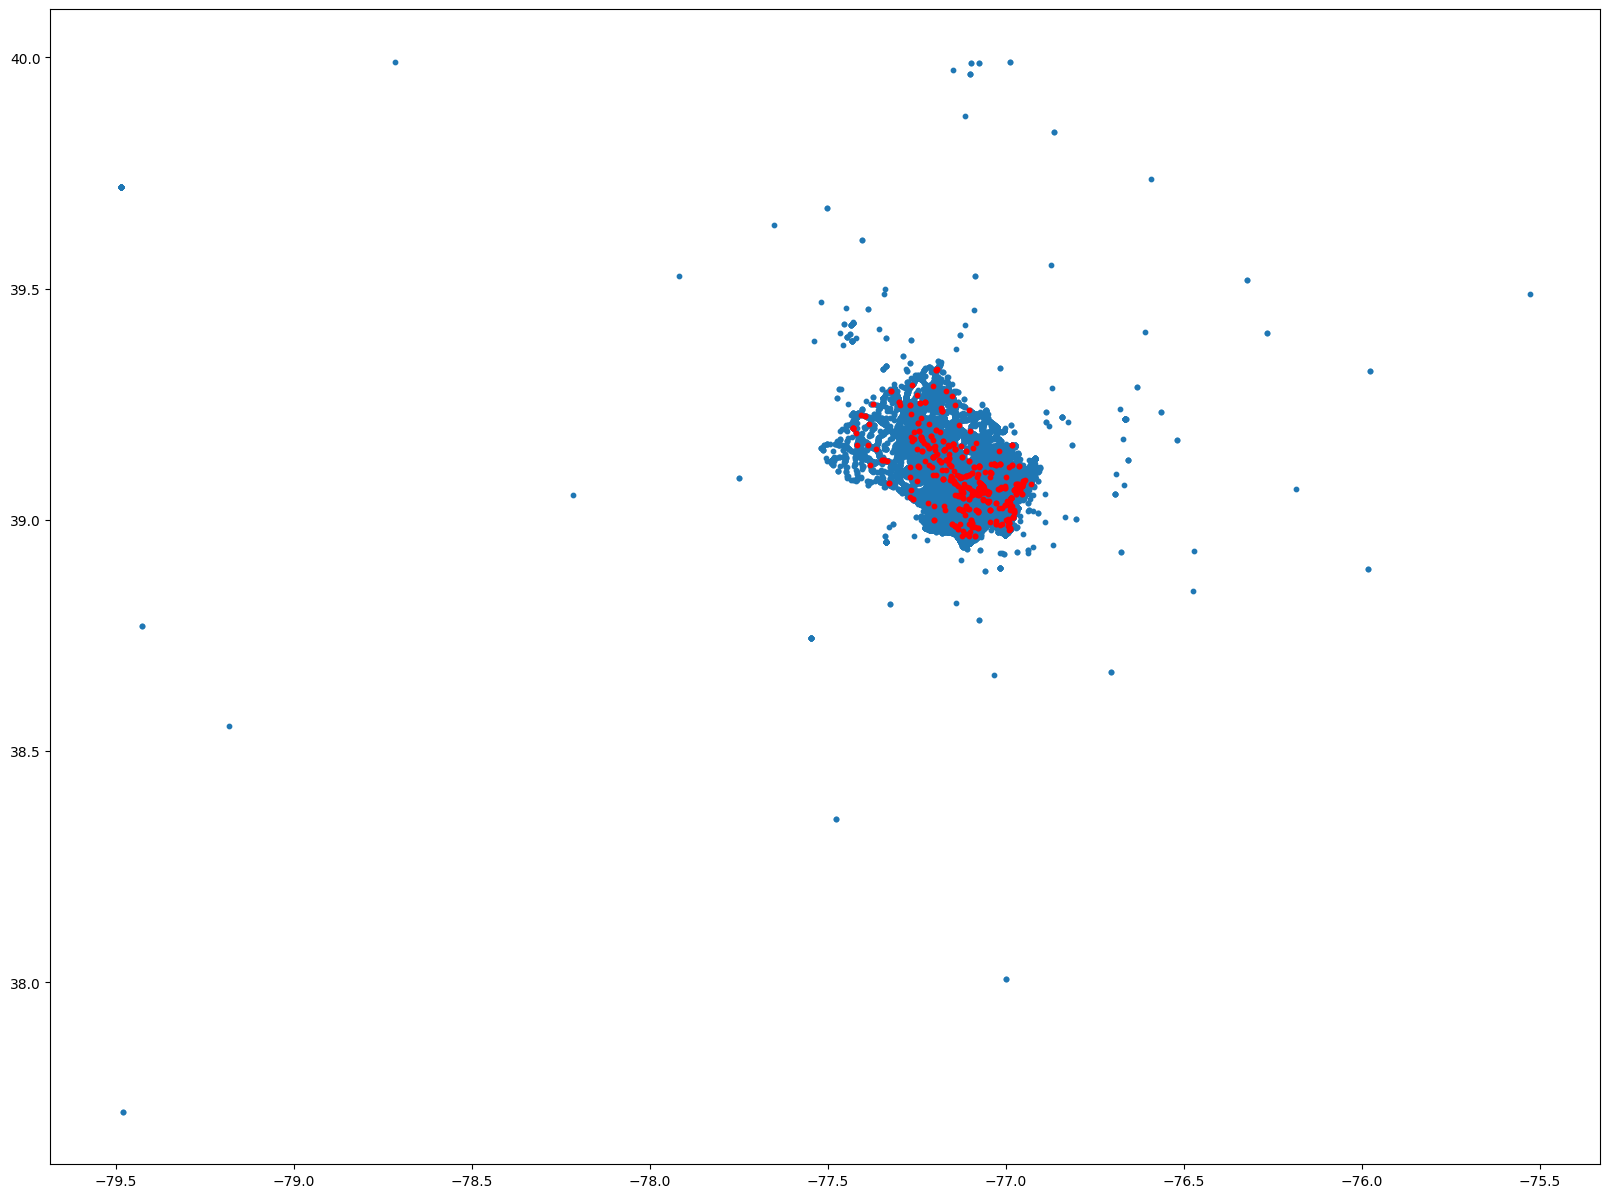

In [28]:
Fatal_Crashes=df[df['ACRS Report Type']=='Fatal Crash']
plt.figure(figsize=(20, 15))

plt.scatter (df['Longitude'],
             df['Latitude'],
             s=10)
plt.scatter (Fatal_Crashes['Longitude'],
                Fatal_Crashes['Latitude'],
                color='red',
                s=10);

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


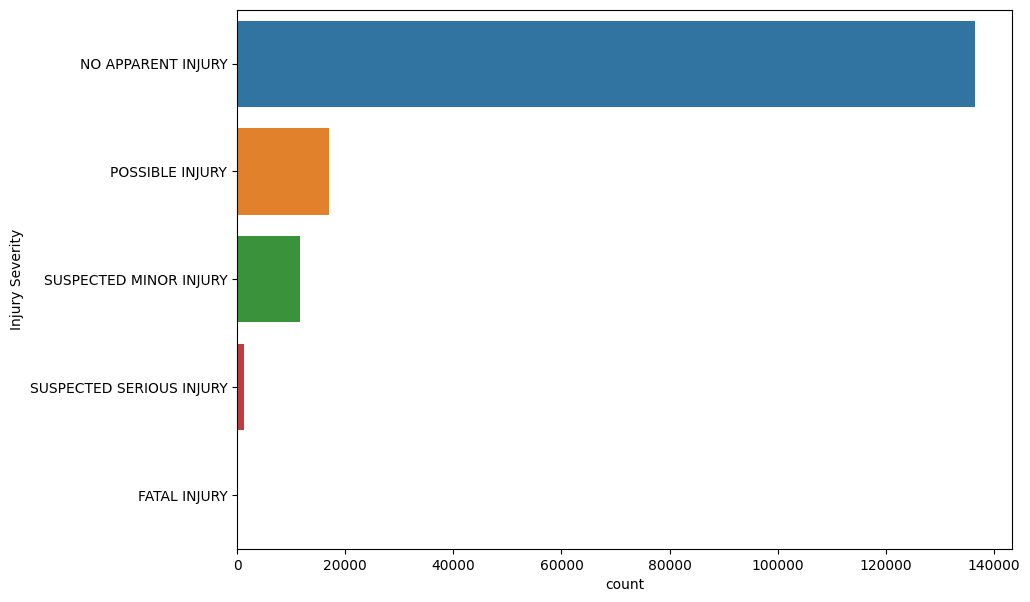

In [29]:
plt.figure(figsize=(10, 7))
sns.countplot(y='Injury Severity',data=df,order=df['Injury Severity'].value_counts().index);

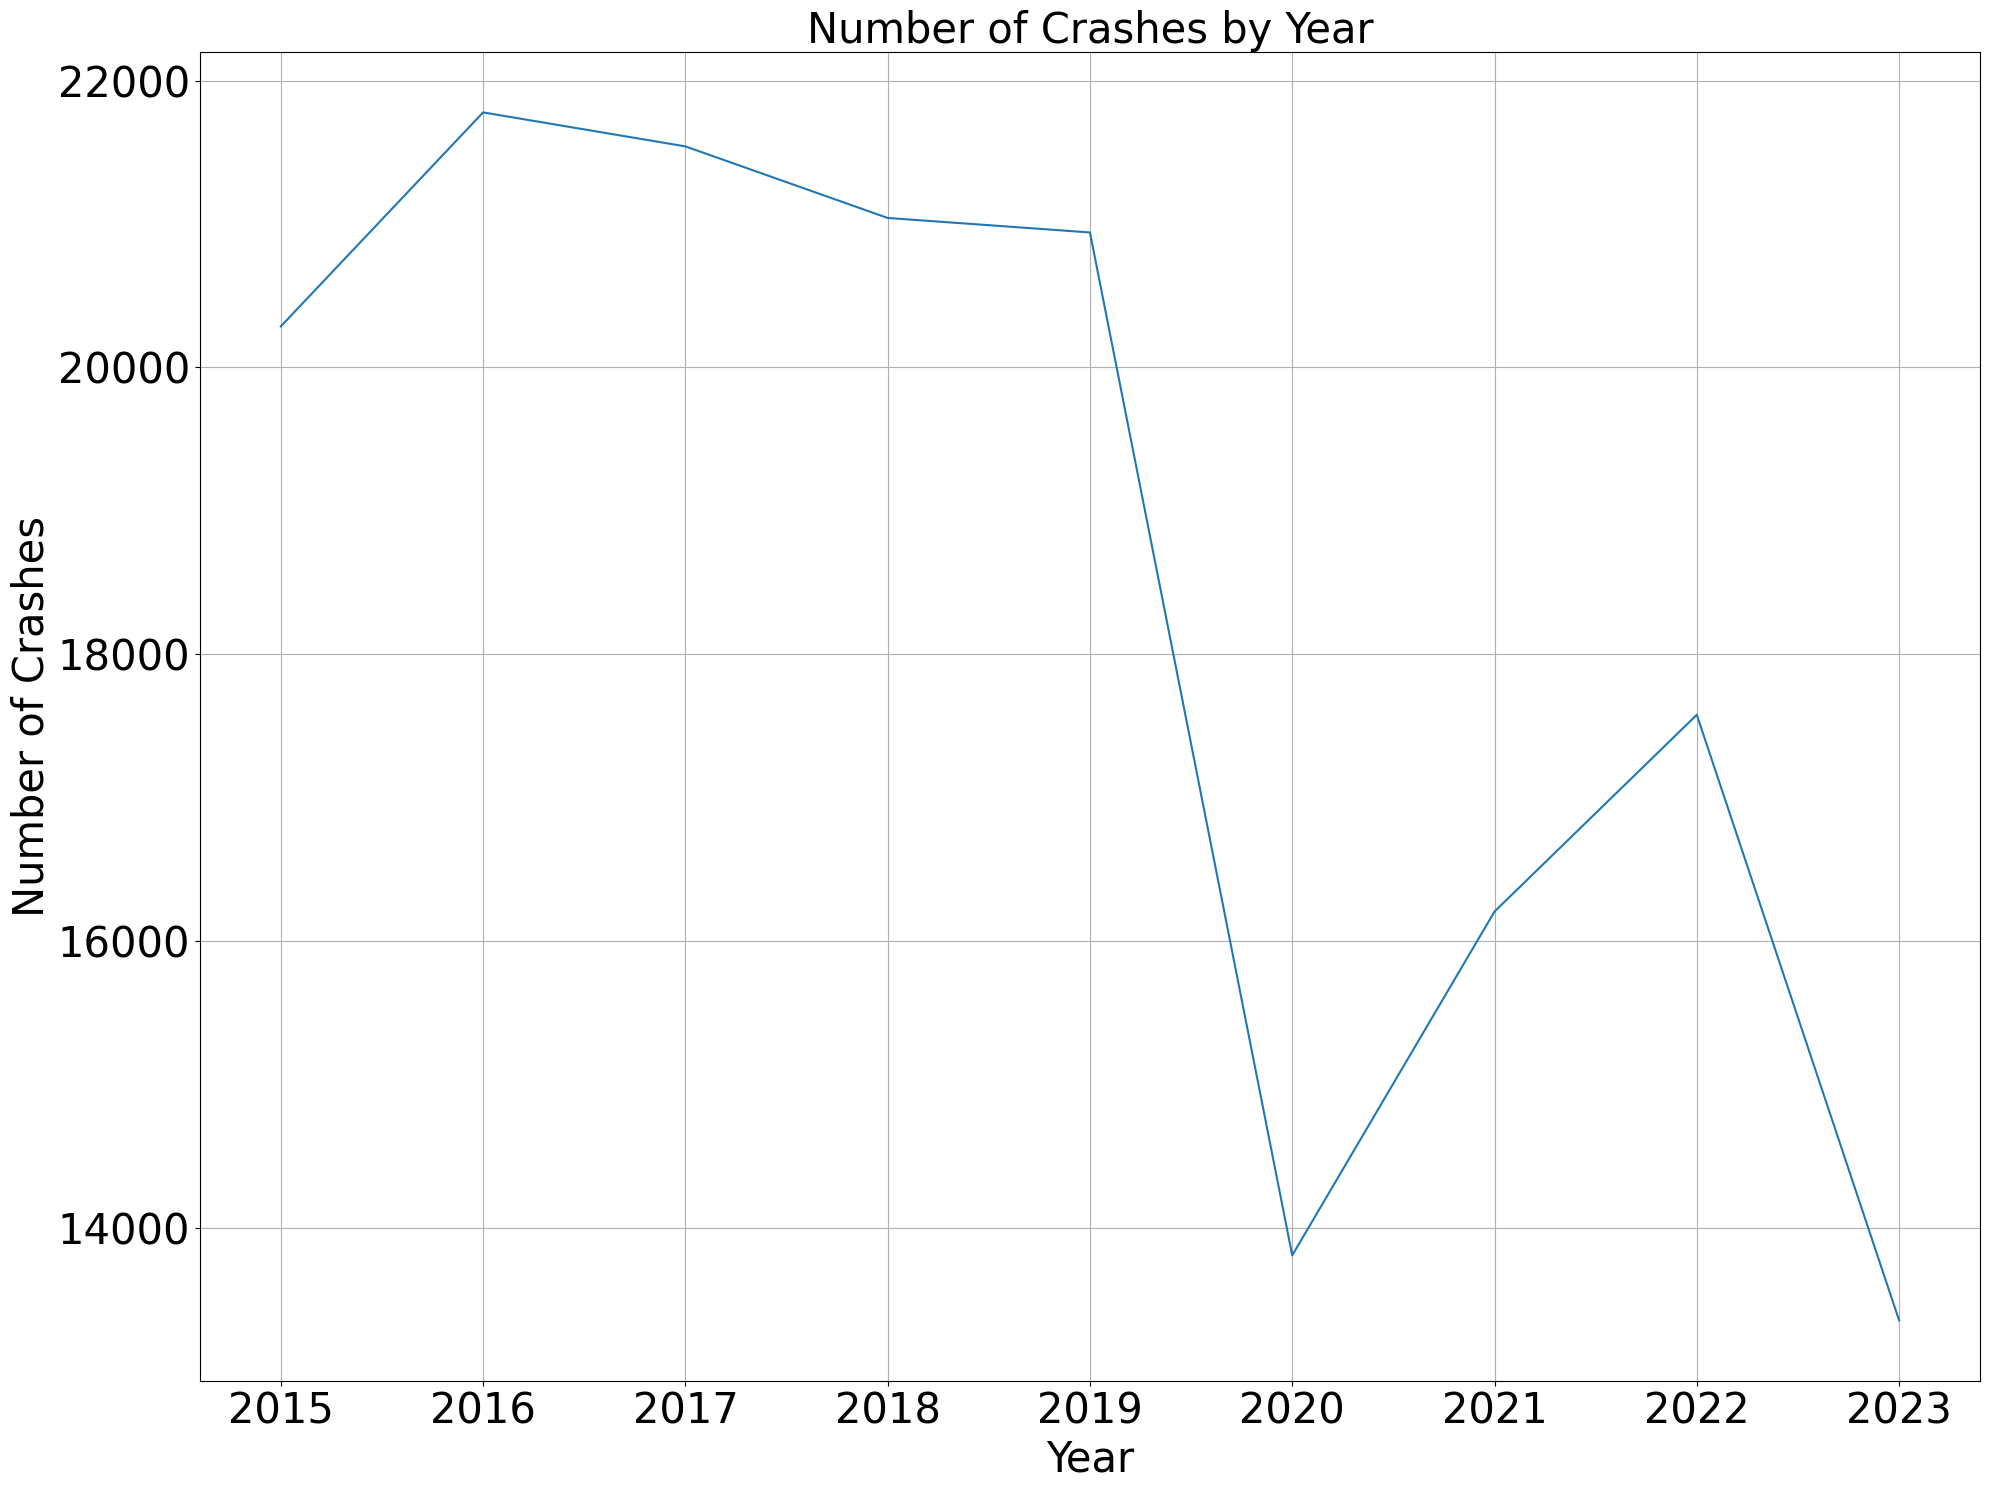

In [30]:
df['Crash Date/Time'].dt.year.value_counts().sort_index().plot(kind='line',figsize=(20, 15))
plt.title('Number of Crashes by Year',fontsize=30)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();

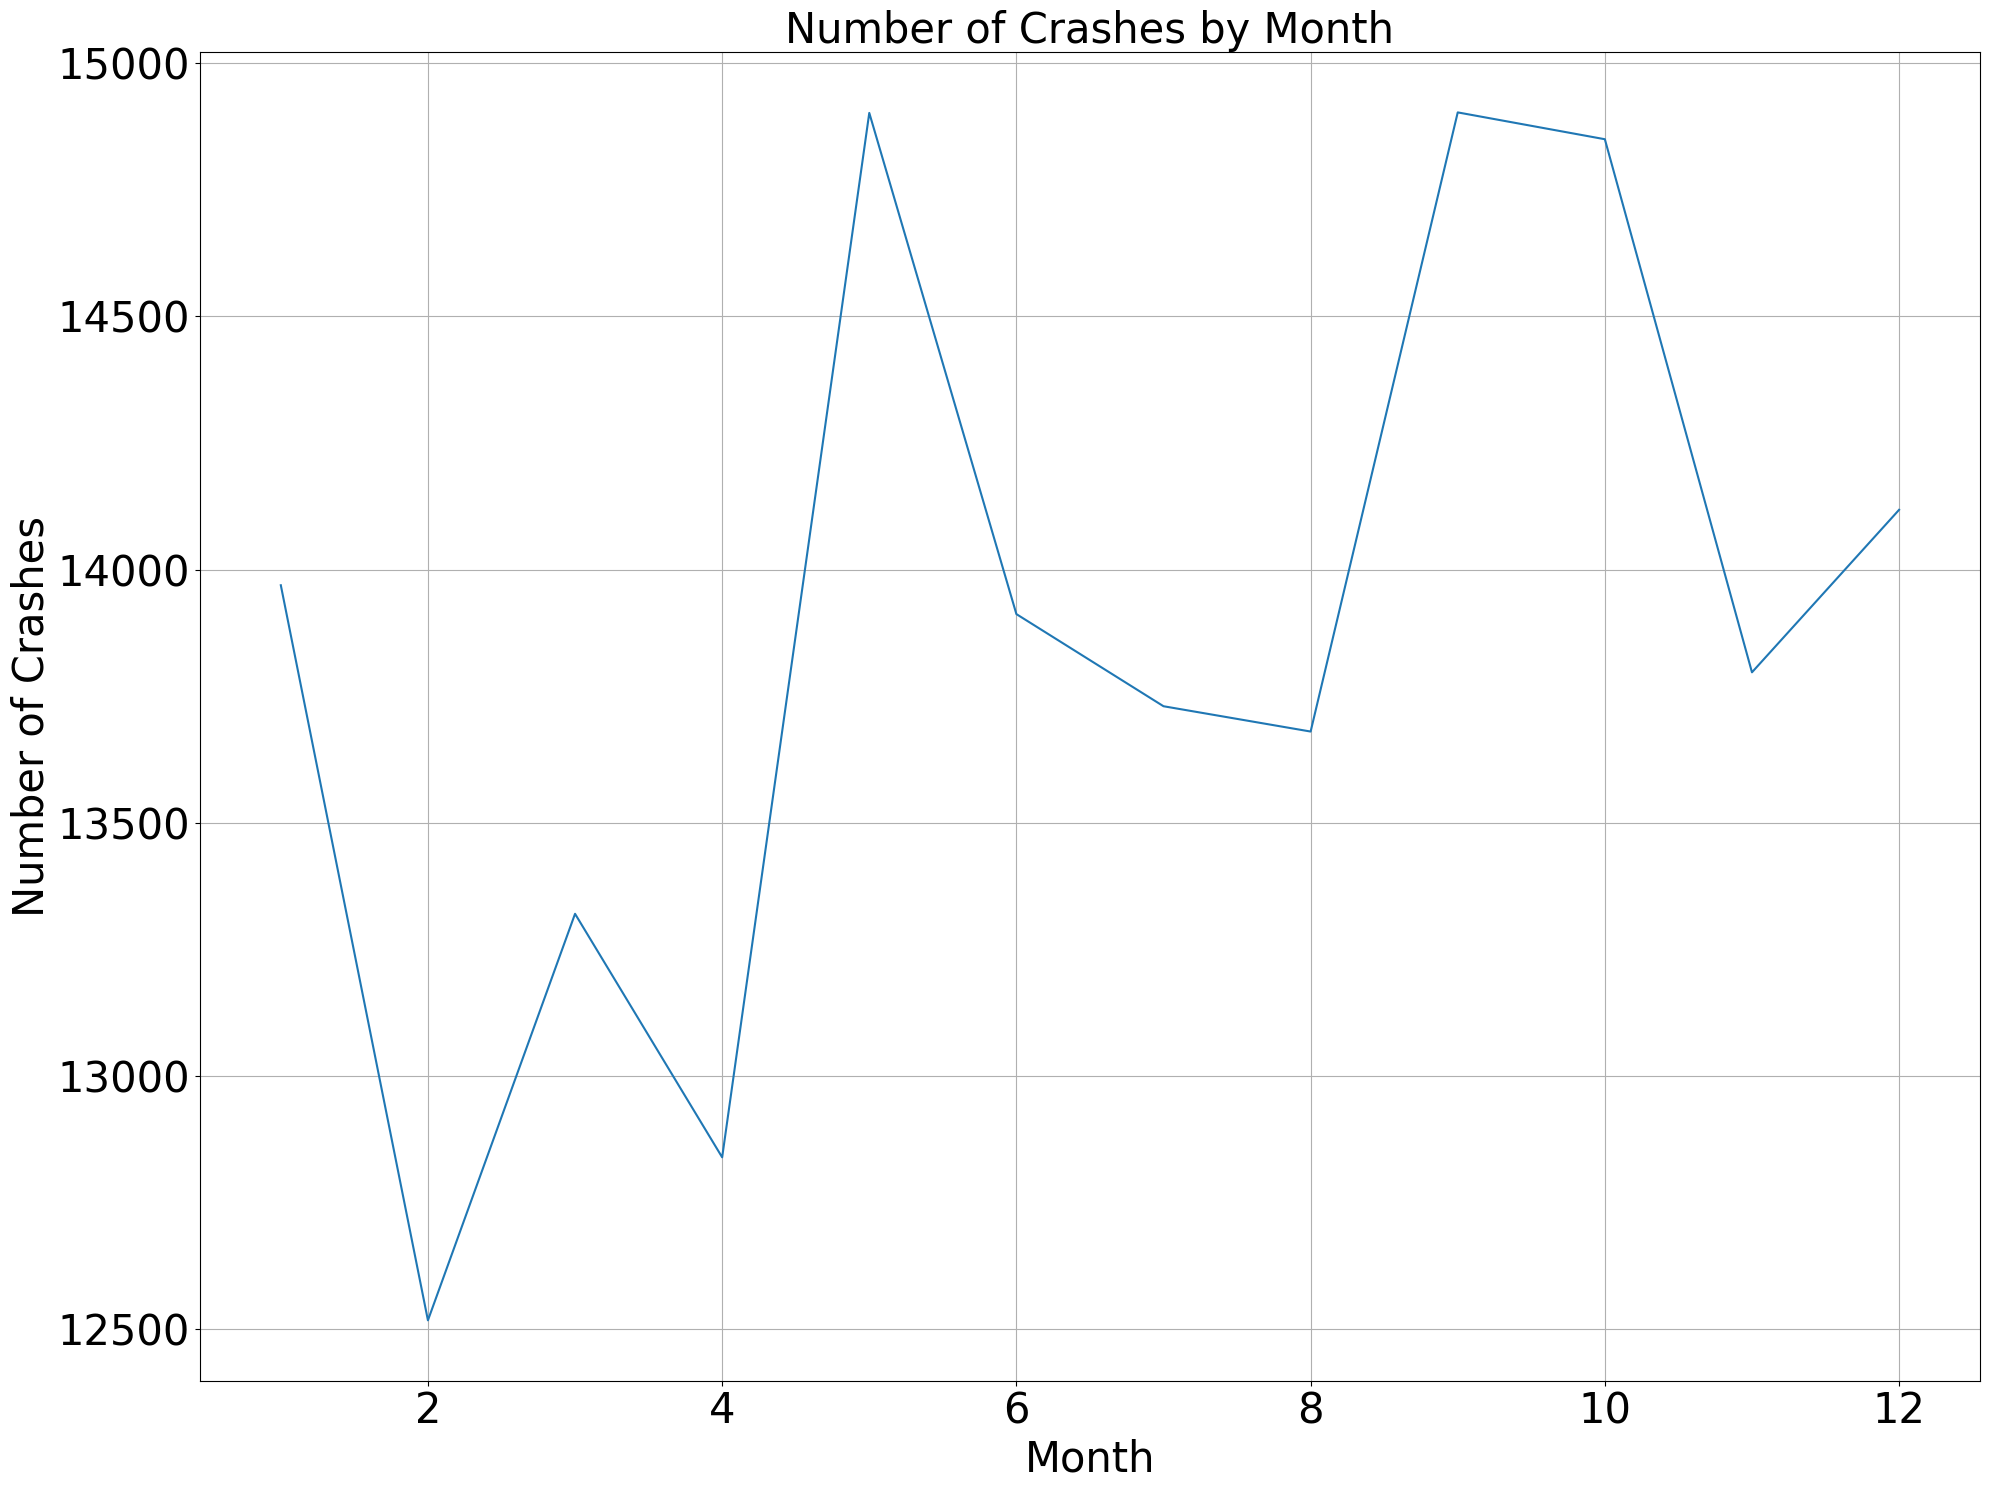

In [31]:
df['Crash Date/Time'].dt.month.value_counts().sort_index().plot(kind='line',figsize=(20, 15))
plt.title('Number of Crashes by Month', fontsize=30)
plt.xlabel('Month',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();

- Least number of crashes in 2020 possibly due to covid. 
- 2023 is notably less because the year isnt over yet

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

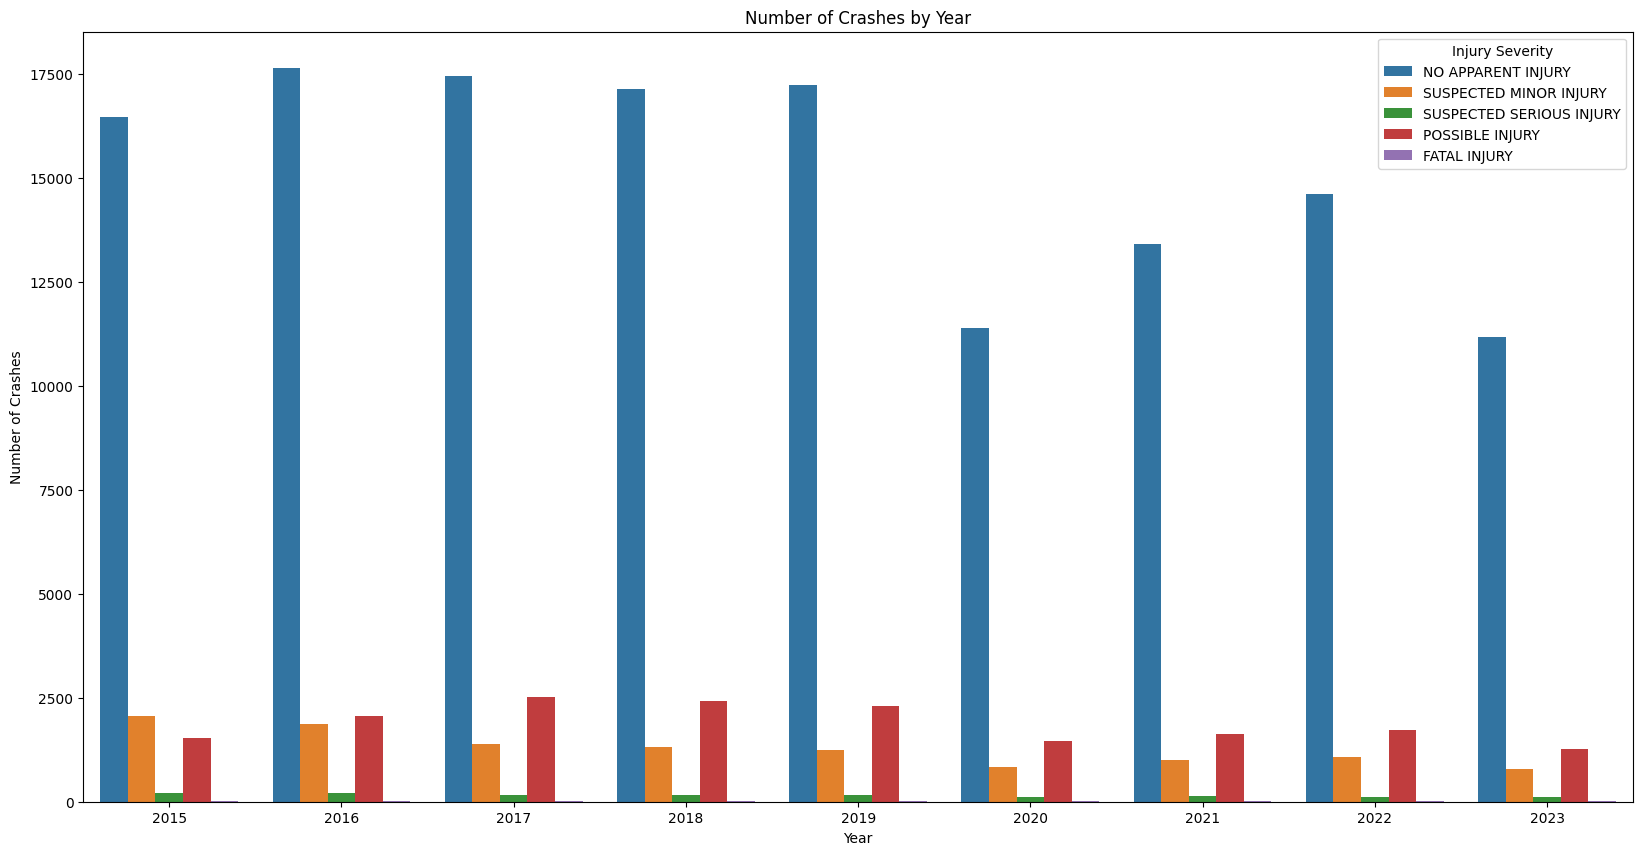

In [32]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['Crash Date/Time'].dt.year, hue=df['Injury Severity'])
plt.title('Number of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes');

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

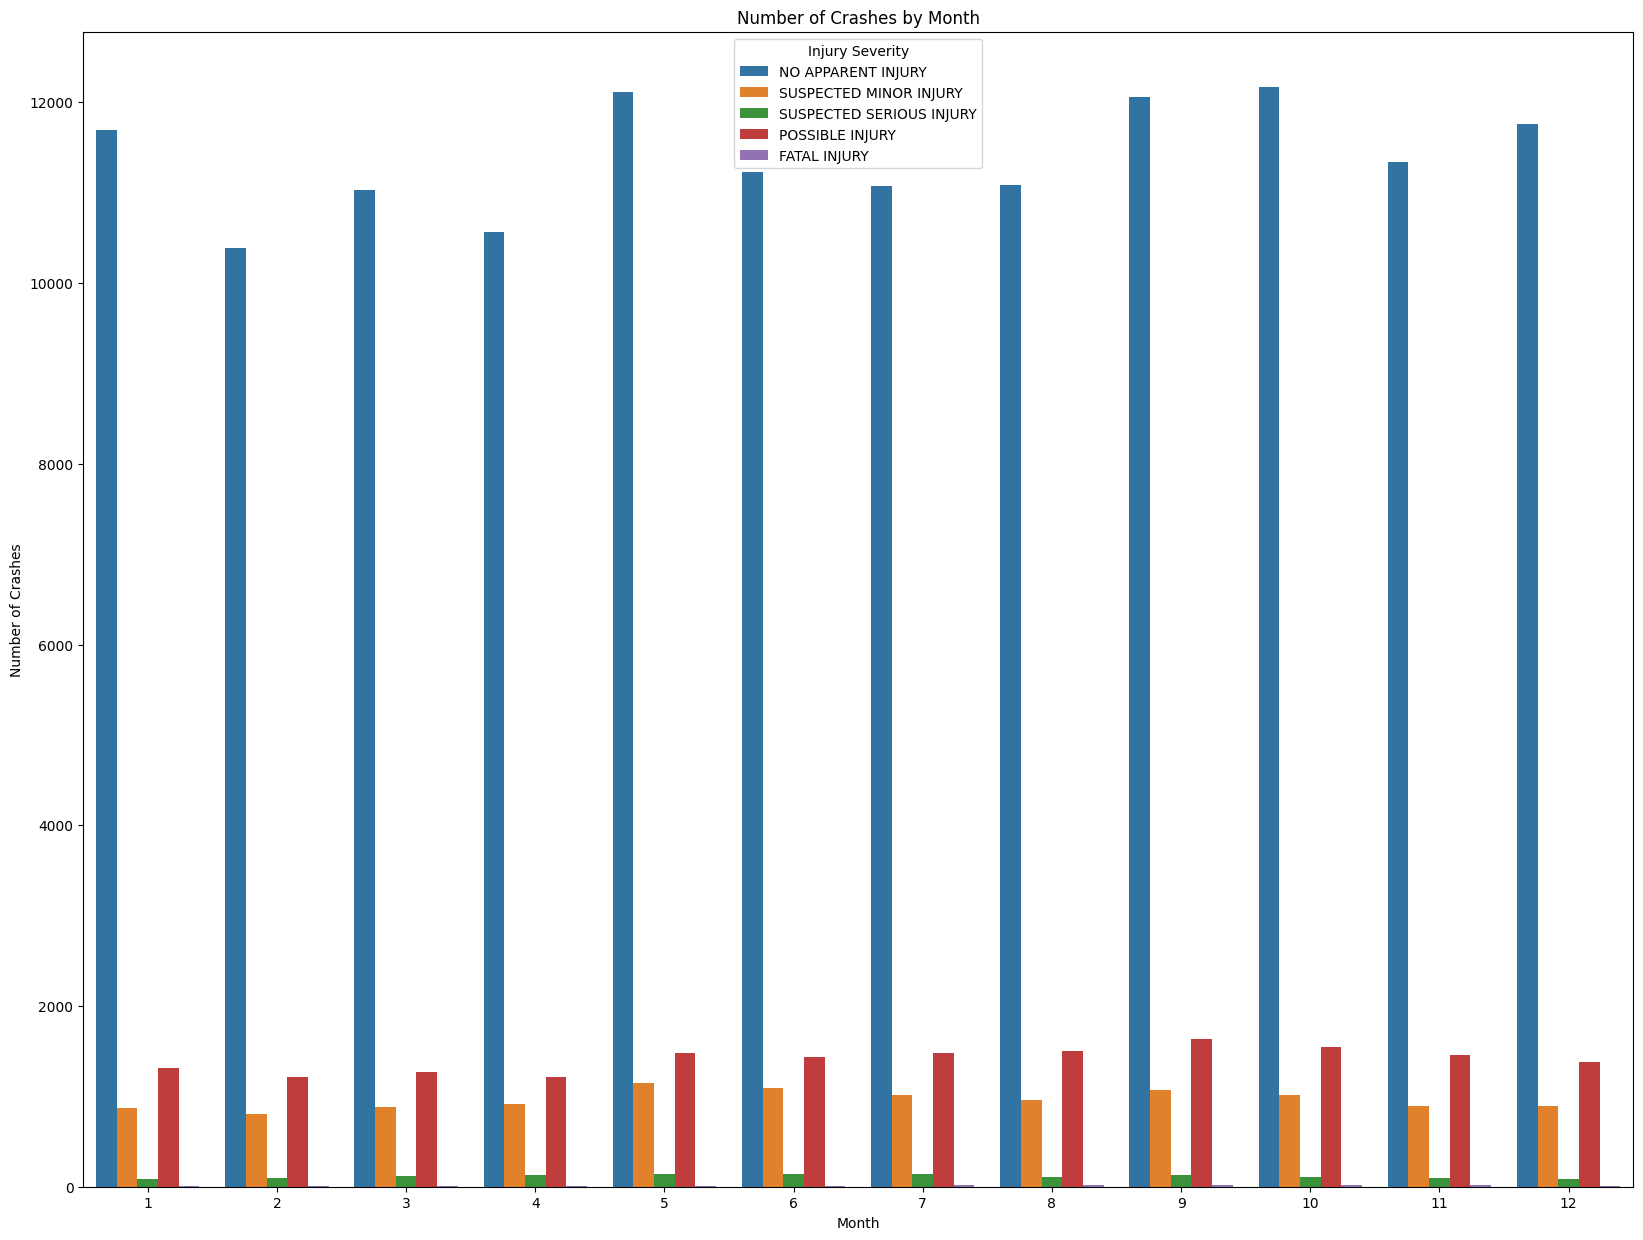

In [33]:
# crash monthly granularity
plt.figure(figsize=(20, 15))
sns.countplot(x=df['Crash Date/Time'].dt.month, hue=df['Injury Severity'])
plt.title('Number of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes');

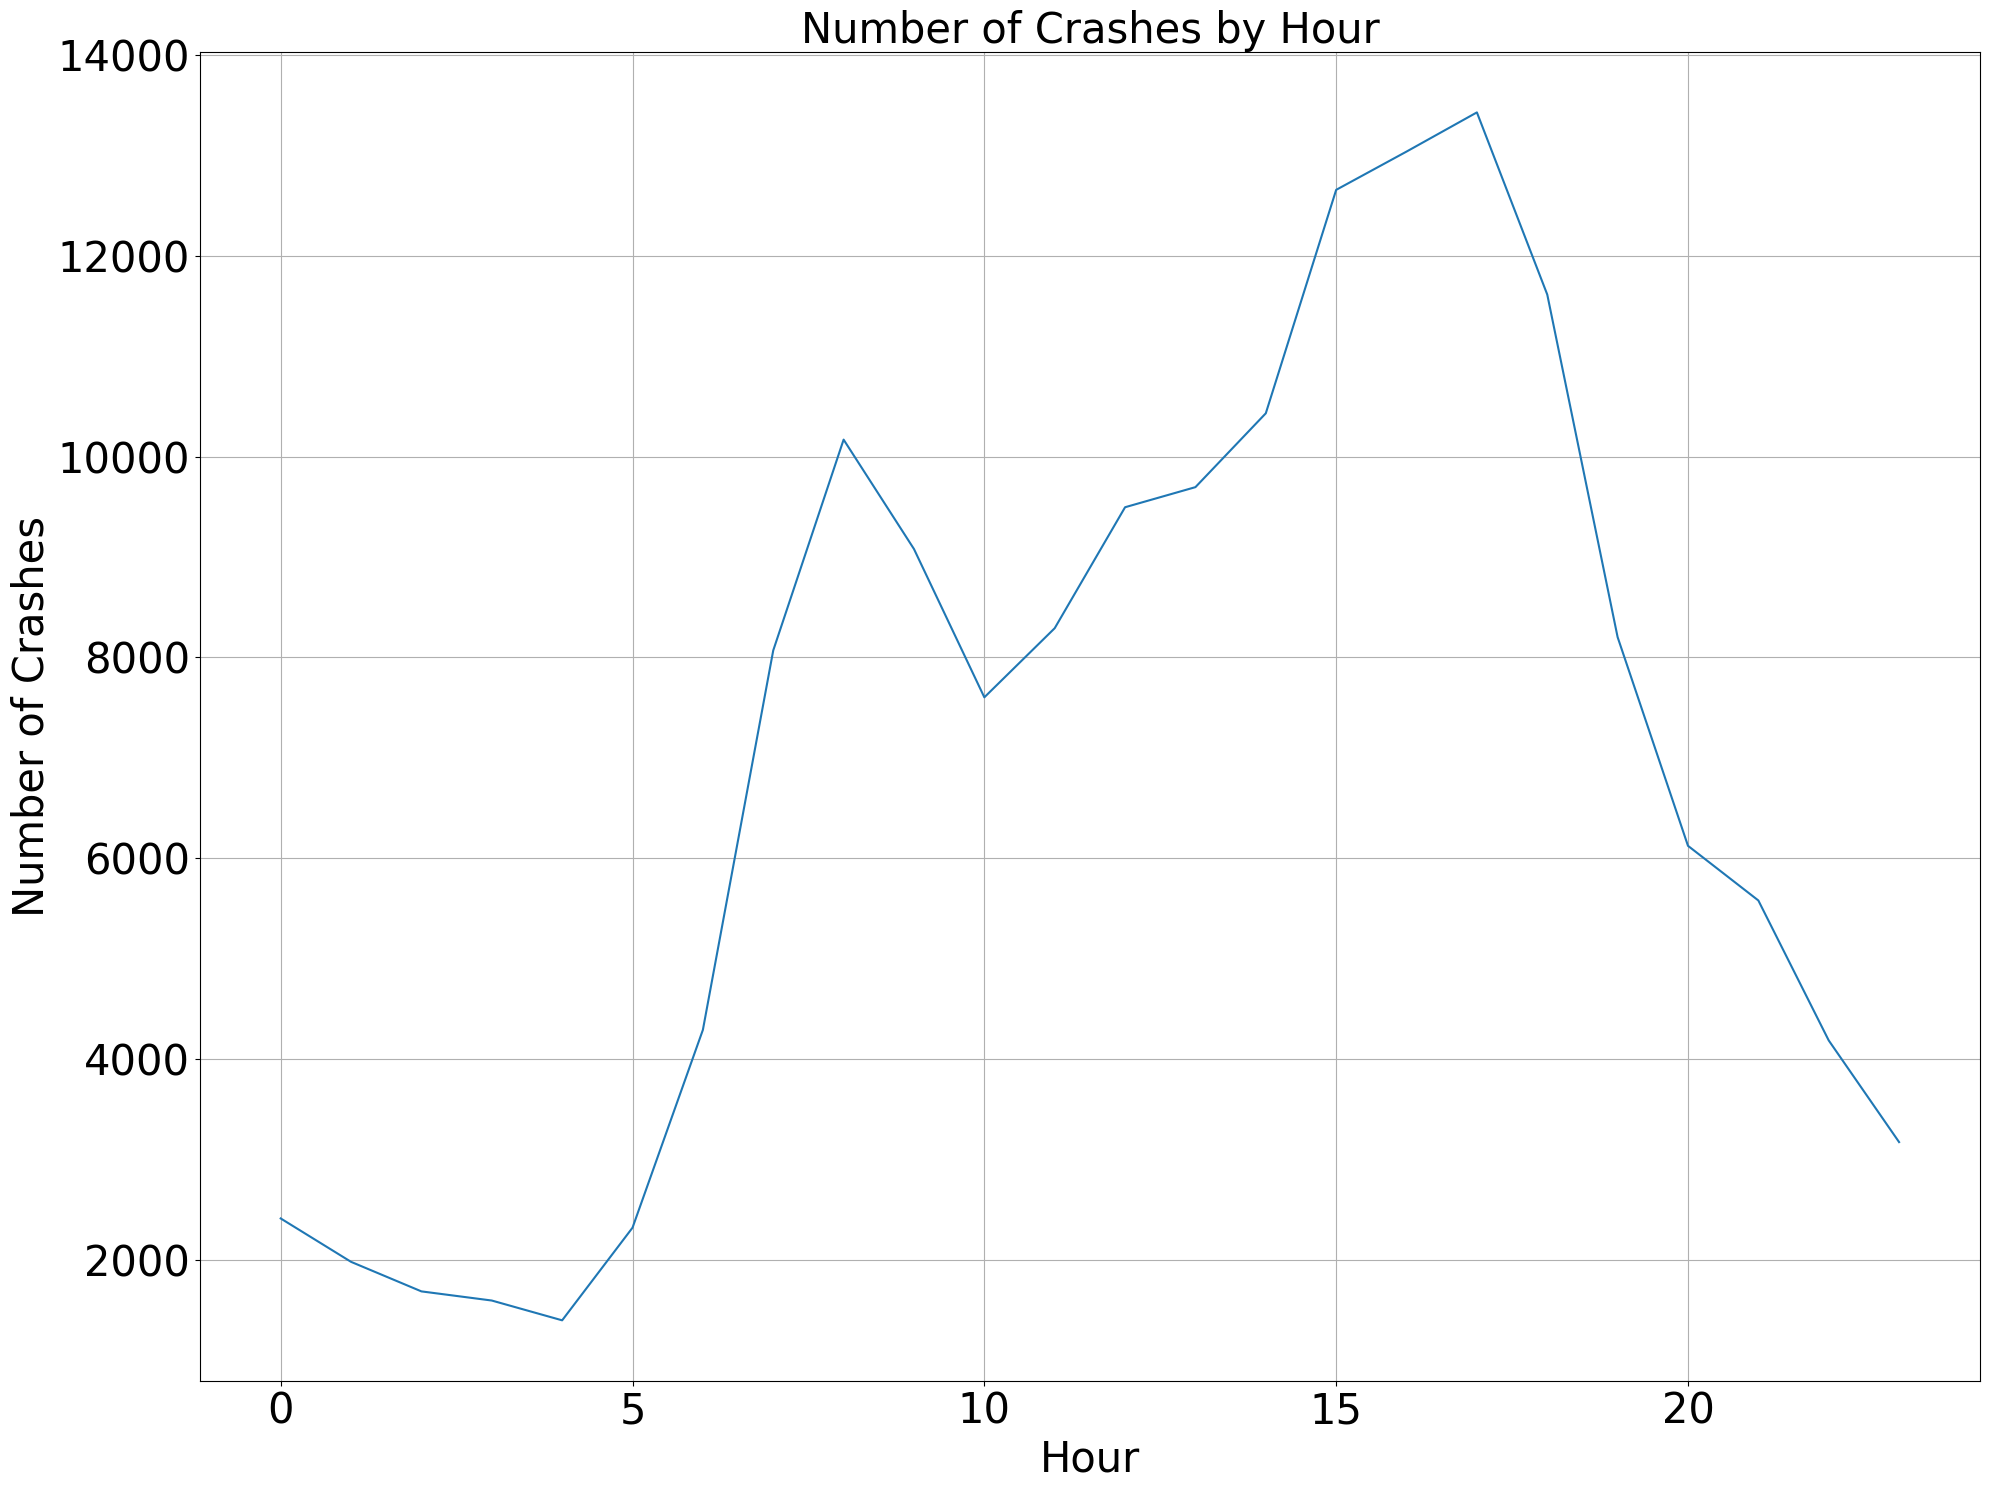

In [34]:
# accident hourly granularity and make it a line plot
plt.figure(figsize=(20, 15))
df['Crash Date/Time'].dt.hour.value_counts().sort_index().plot(kind='line')
#sns.countplot(x=df['Crash Date/Time'].dt.hour)
plt.title('Number of Crashes by Hour',fontsize=30)
plt.xlabel('Hour', fontsize=30)
plt.ylabel('Number of Crashes', fontsize=30);
# inrease the fontsize of the xticks and yticks
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();


- Peak around 6pm due to rush hours

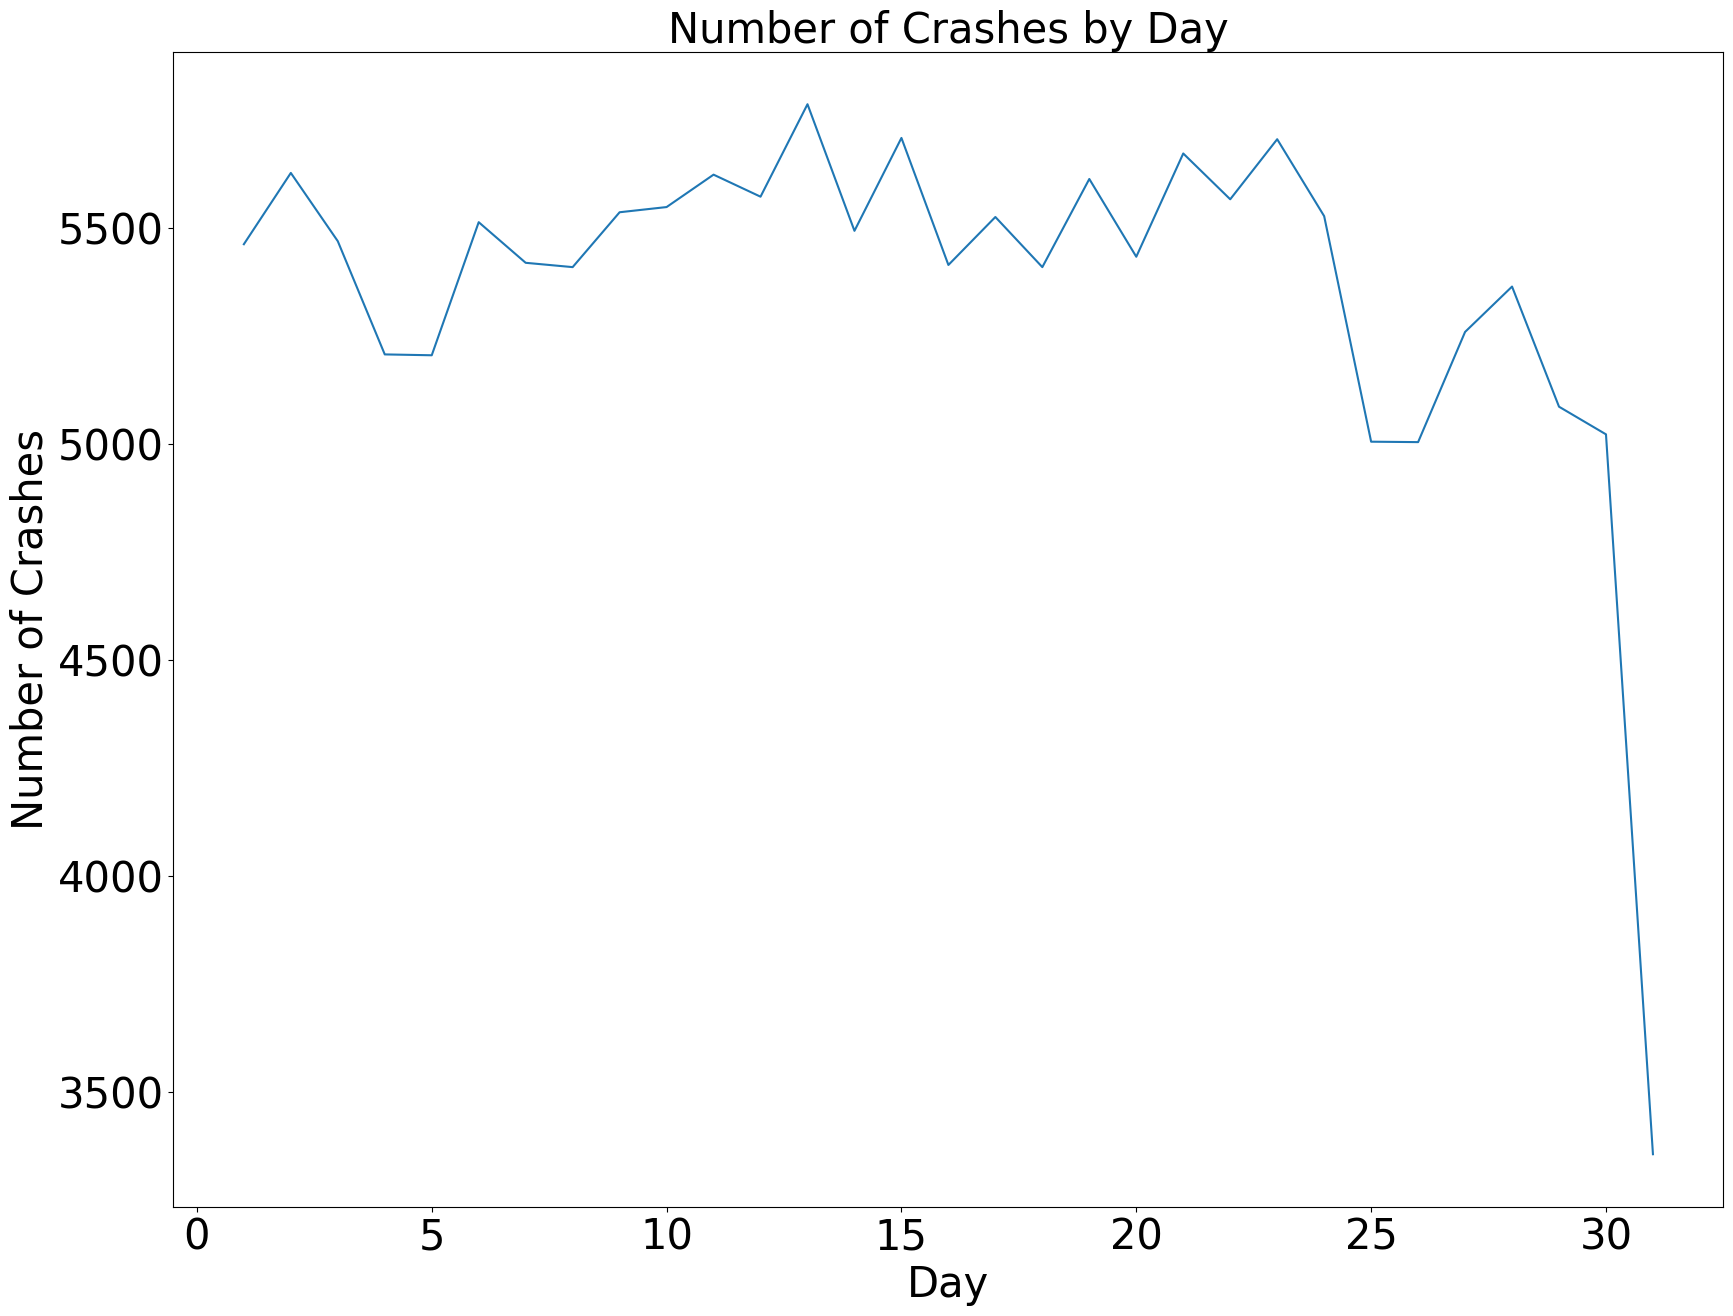

In [35]:
# accident daily granularity and make it a line plot
plt.figure(figsize=(20, 15))
df['Crash Date/Time'].dt.day.value_counts().sort_index().plot(kind='line')
plt.title('Number of Crashes by Day',fontsize=30)
plt.xlabel('Day',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30);


/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


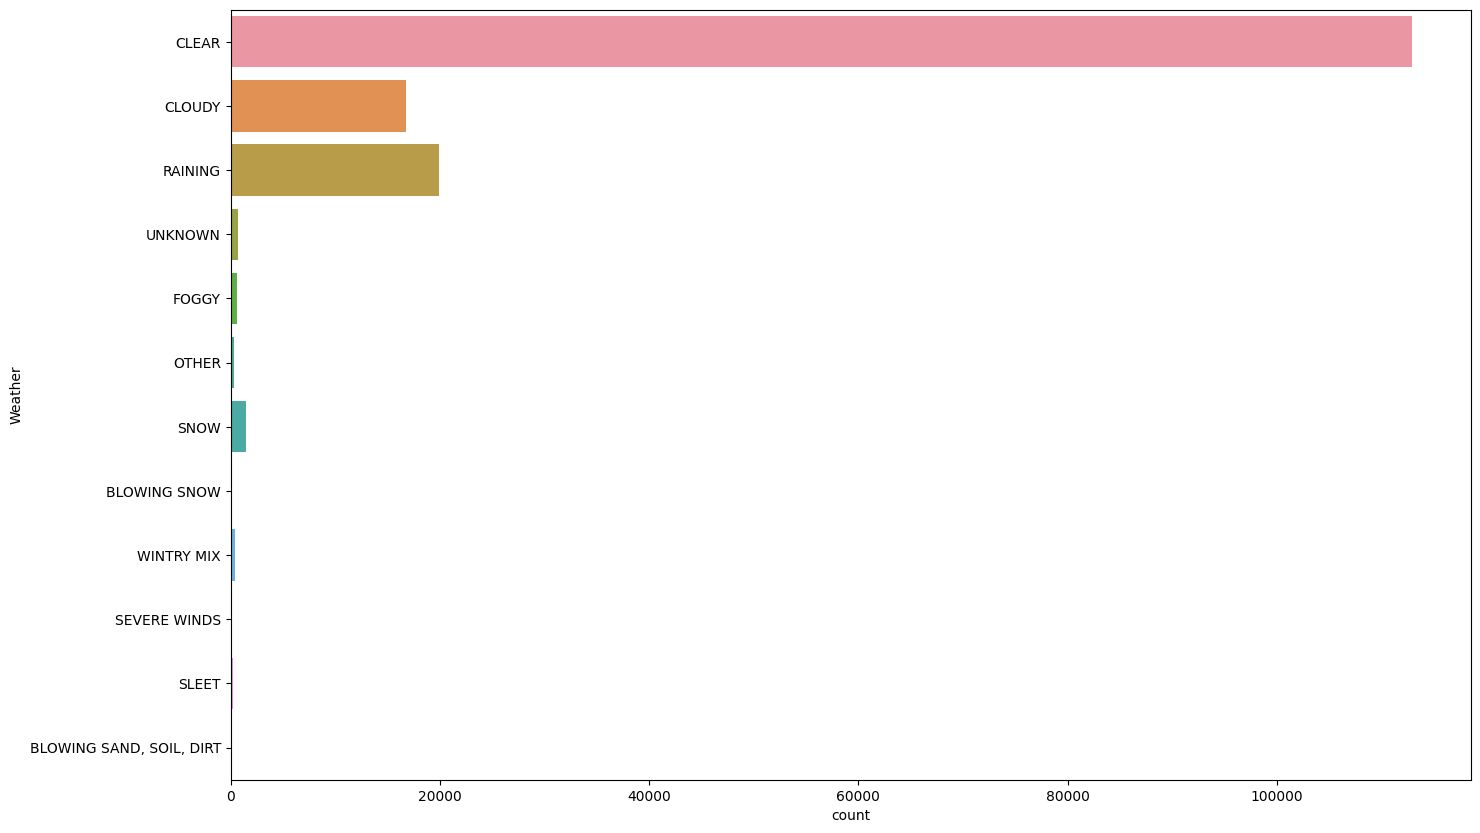

In [36]:
plt.figure(figsize=(16, 10))
sns.countplot(y=df['Weather']);

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


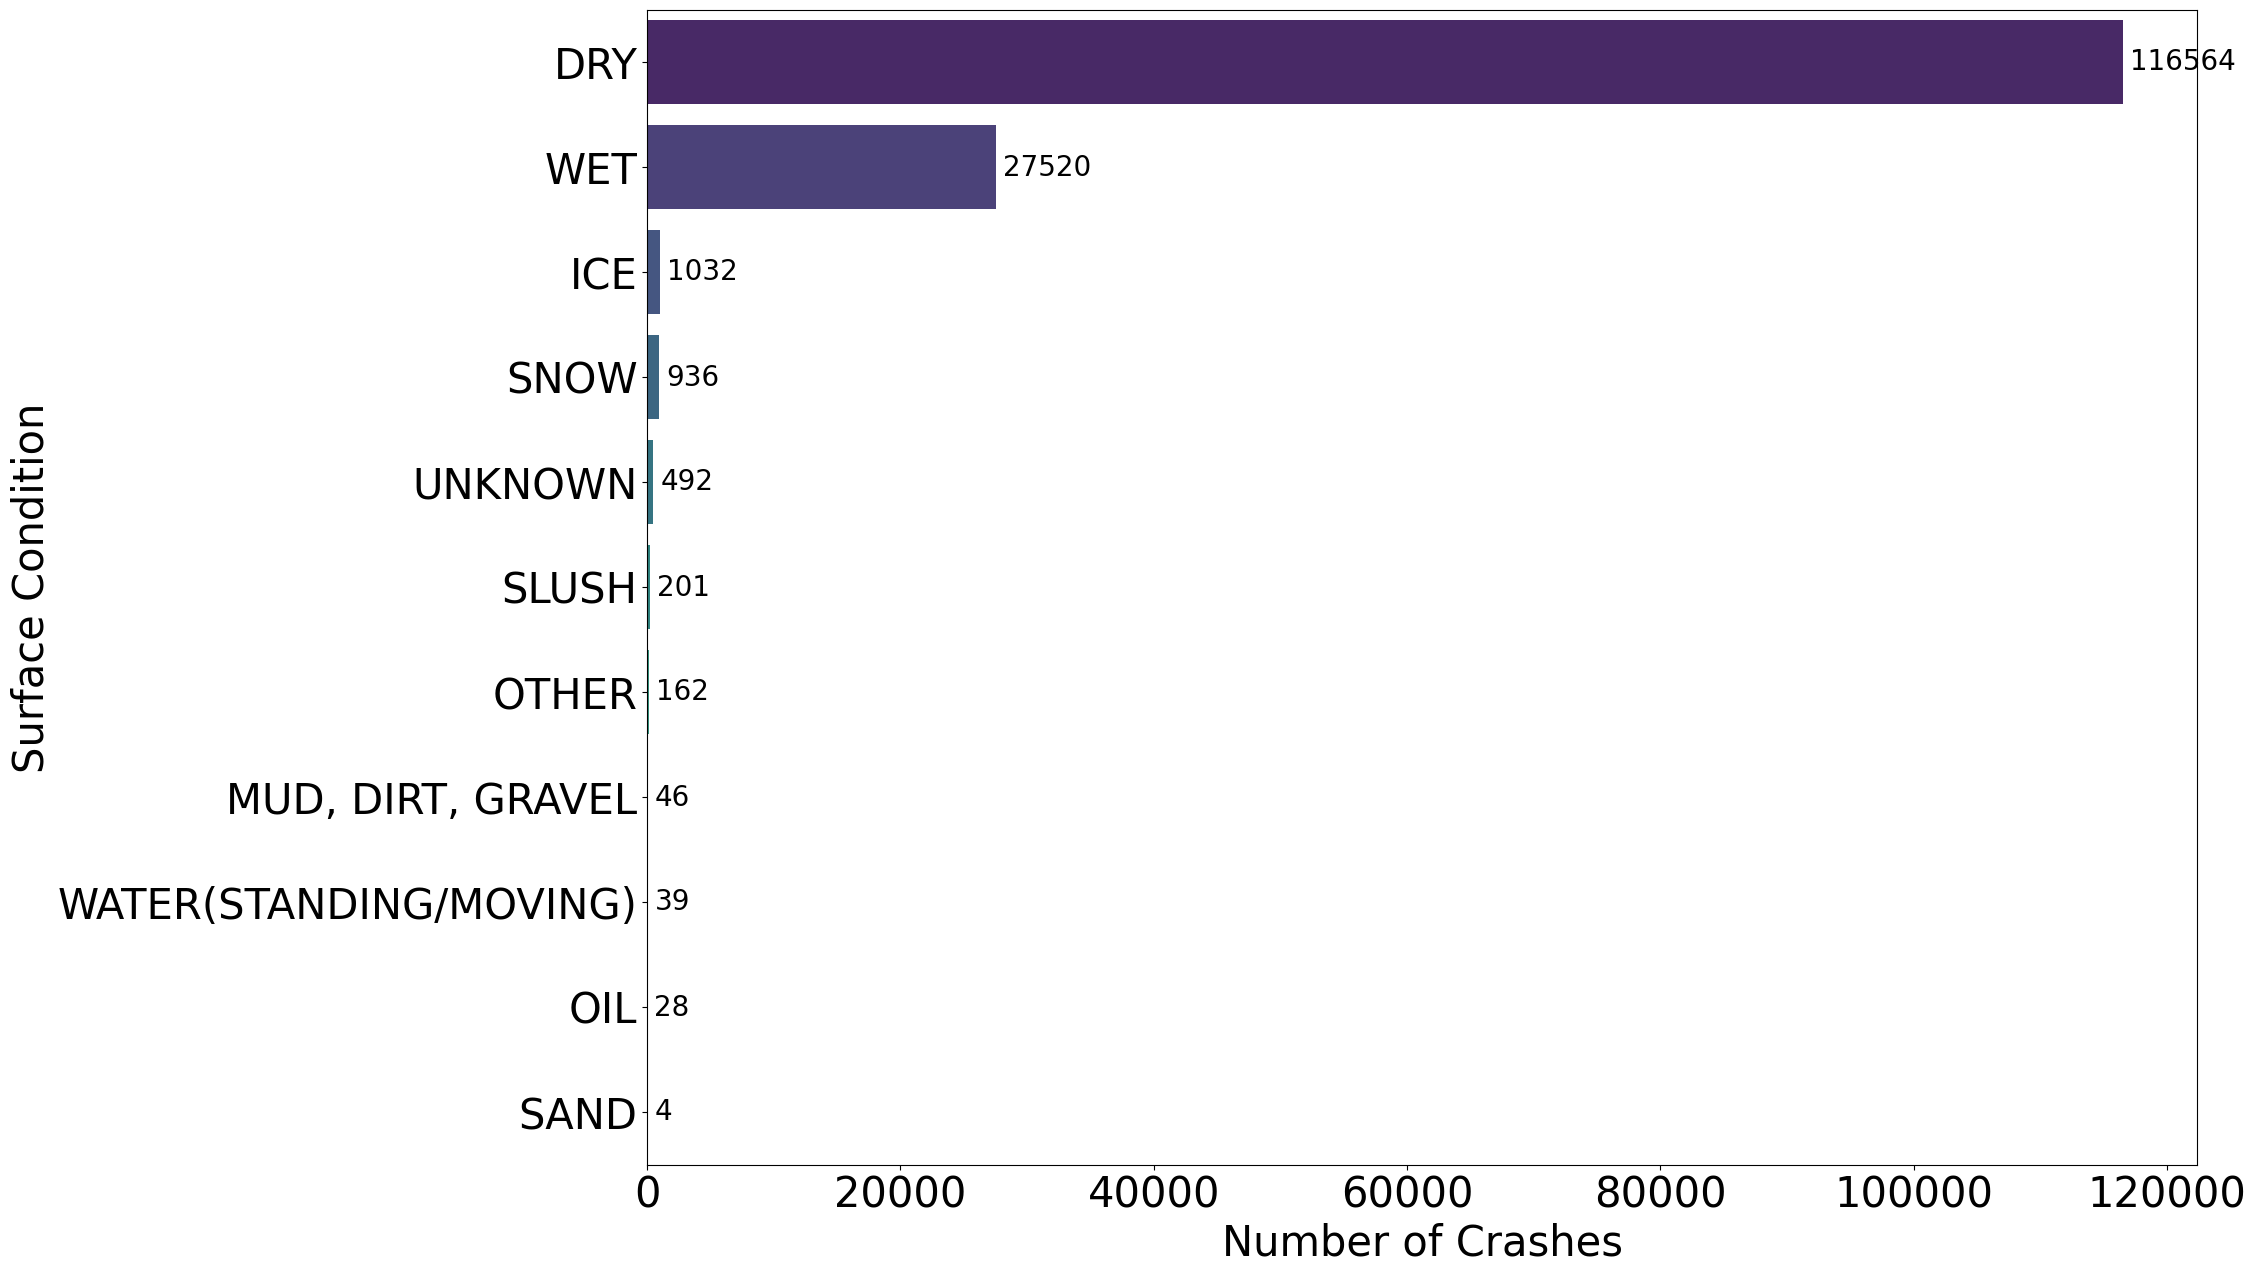

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Order bars by count
order = df['Surface Condition'].value_counts().index

# Plot
ax = sns.countplot(y=df['Surface Condition'], order=order, palette="viridis")

# Annotate bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', ha='left', xytext=(5,0), textcoords='offset points', fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Number of Crashes',fontsize=30)
plt.ylabel('Surface Condition',fontsize=30)

plt.show()


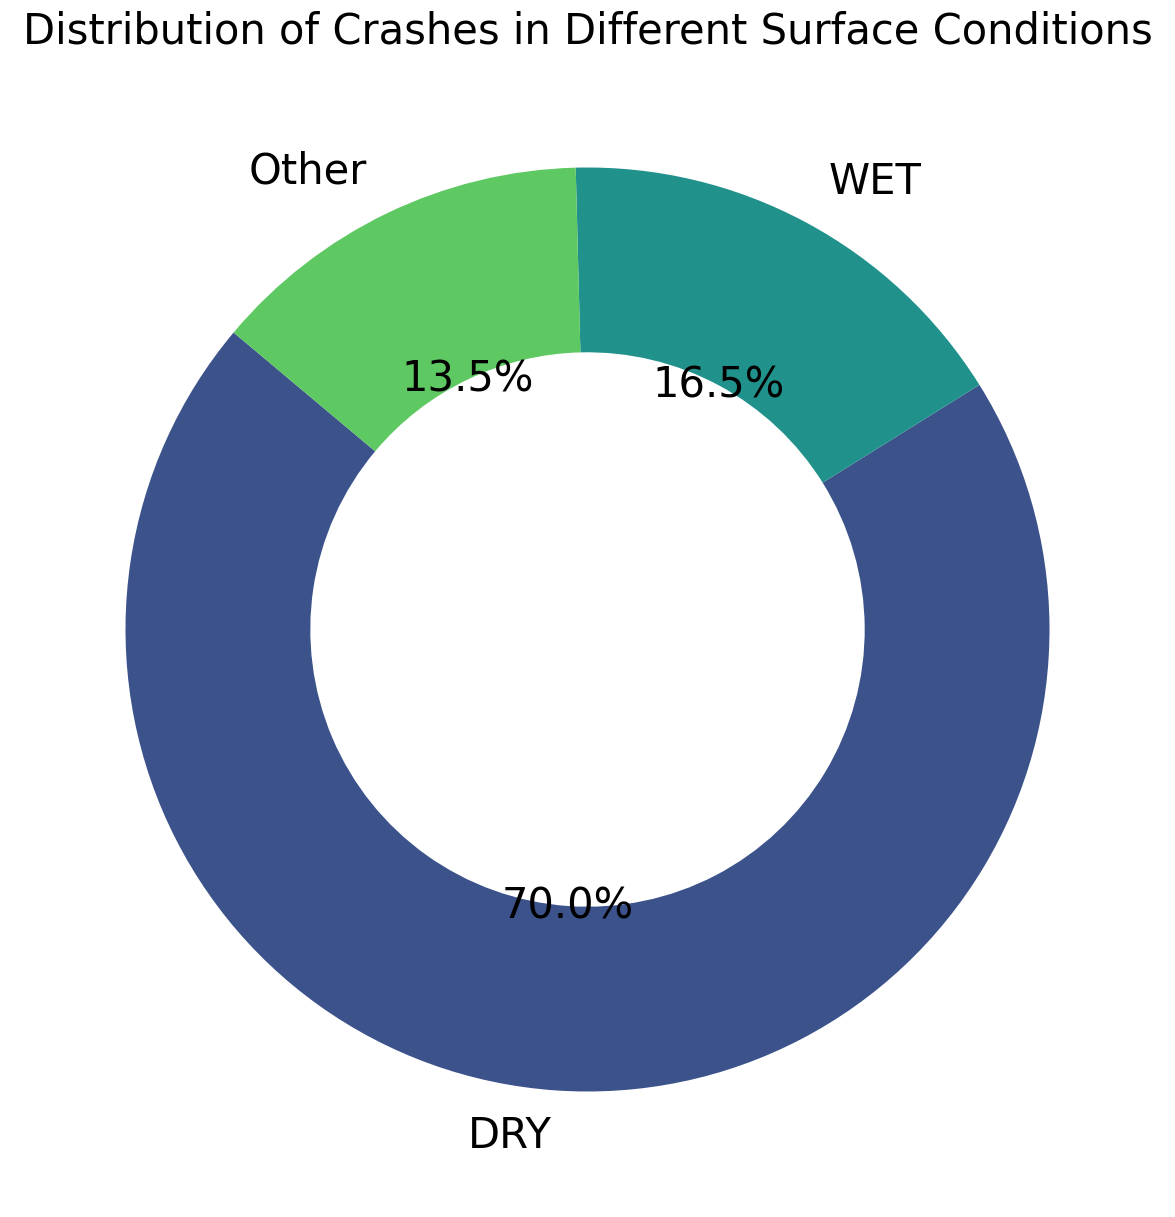

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Modified Conditions']=df['Surface Condition'].apply(lambda x: 'Other' if x not in ['WET','DRY'] else x)

# Data preparation
surface_condition_counts = df['Modified Conditions'].value_counts()

# Plotting the donut chart
plt.figure(figsize=(20, 15))
colors = sns.color_palette("viridis", len(surface_condition_counts))
plt.pie(surface_condition_counts, labels=surface_condition_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4), textprops={'fontsize': 30})
plt.title('Distribution of Crashes in Different Surface Conditions', fontsize=30)

plt.show()


# Model Building 
Before building the models, we performed the following additional preprocessing steps
- Used Kmeans to cluster the longitudes and latutitudes and created a new feature that contains the resulting clusters
- Grouped the date/time columns as follows:
    - Day column was grouped into beginning, middle, and end of the month
    - Hour column was grouped into morning, afternoon, evening, and night
    - Month column was grouped into summer, winter, spring, and fall
- We grouped all instatnces of injury and fatality in the injury severity column as injury and others as no injury
- After dropping the missing values, we assessed the data loss; we found that dropping the missing values did not lead to significant data loss. Also, we will benefit from the improved speed that comes with working with less obeservations

## Class Distribution 
- There is a class imbalance in the data set with a ratio of 70-30 with the postive instances being the minority class.
- To deal with this we tried several methods. First, we used the inbuilt class weight funtion in Random forest. To assigns a bigger weight to the minority class. Since XGBoost doesnt have the class weight paramet, we used its  equivalent for XGBoost which is Scale-pos-weight.
- We also tried undersampling to see if performance will improve. We thought this will be a good idea because the dataset is large, and we would benefit from the improved speed.

In [39]:
df2['Injury Severity'].value_counts(normalize=True)

Injury Severity
NO APPARENT INJURY          0.792072
POSSIBLE INJURY             0.118874
SUSPECTED MINOR INJURY      0.079526
SUSPECTED SERIOUS INJURY    0.008783
FATAL INJURY                0.000745
Name: proportion, dtype: float64

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


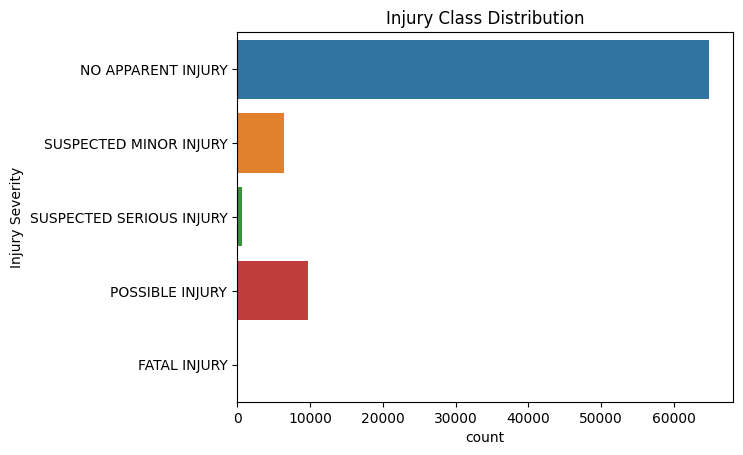

In [40]:
sns.countplot(y=df2['Injury Severity']);
plt.title('Injury Class Distribution');

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81860 entries, 1 to 166535
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ACRS Report Type                81860 non-null  object        
 1   Crash Date/Time                 81860 non-null  datetime64[ns]
 2   Route Type                      81860 non-null  object        
 3   Road Name                       81860 non-null  object        
 4   Cross-Street Type               81860 non-null  object        
 5   Cross-Street Name               81860 non-null  object        
 6   Collision Type                  81860 non-null  object        
 7   Weather                         81860 non-null  object        
 8   Surface Condition               81860 non-null  object        
 9   Light                           81860 non-null  object        
 10  Traffic Control                 81860 non-null  object        
 11  Driver

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


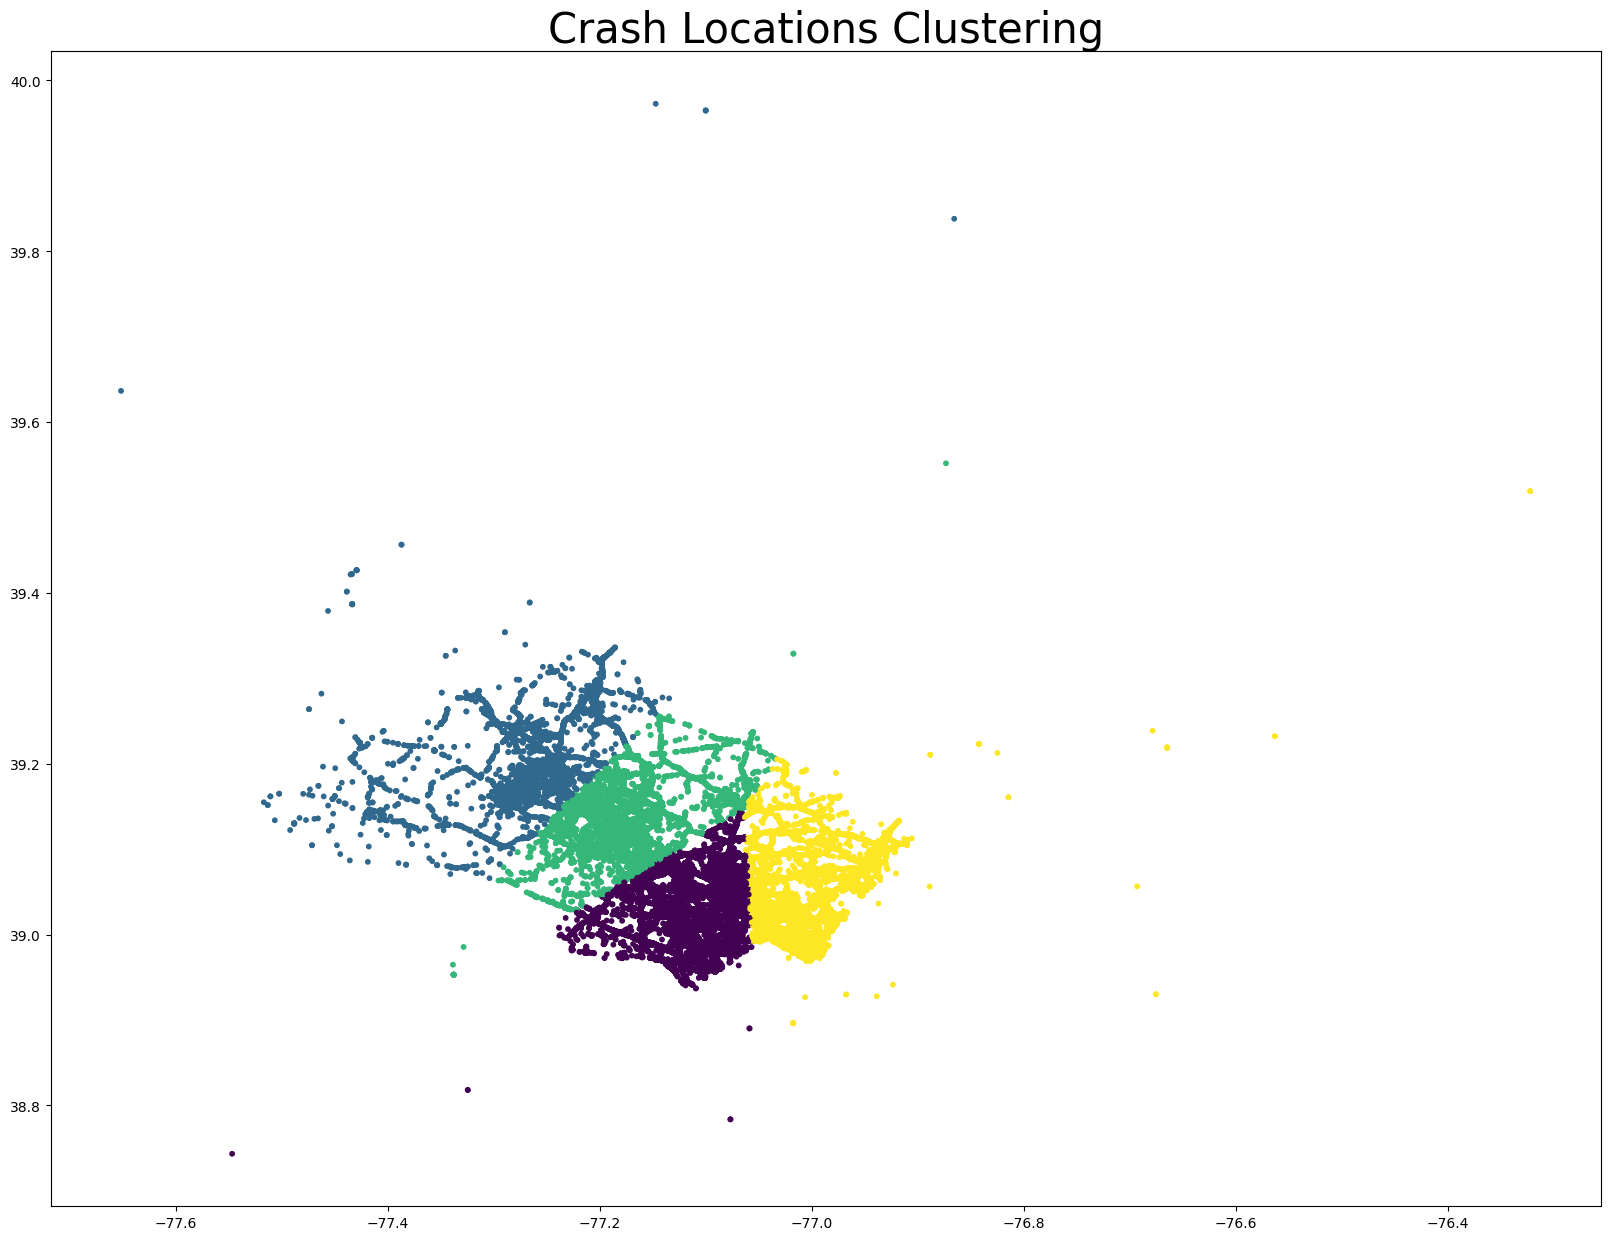

In [42]:
model=KMeans(n_clusters=4)
model.fit(df2[['Longitude','Latitude']])
clusters=model.predict(df2[['Longitude','Latitude']])
plt.figure(figsize=(20, 15))
plt.scatter(df2['Longitude'],df2['Latitude'],c=clusters,s=10,cmap='viridis')
plt.title('Crash Locations Clustering',fontsize=30);


In [43]:
df2['location_cluster']=clusters
df2.drop(['Longitude','Latitude'],axis=1,inplace=True)
df2['location_cluster'].value_counts()

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/3967966888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location_cluster']=clusters
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/3967966888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['Longitude','Latitude'],axis=1,inplace=True)


location_cluster
3    25358
0    25156
2    20870
1    10476
Name: count, dtype: int64

In [44]:
df2['location_cluster'].replace({0:'Location_0',1:'Location_1',2:'Location_2',3:'Location_3'},inplace=True)

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/2570078246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location_cluster'].replace({0:'Location_0',1:'Location_1',2:'Location_2',3:'Location_3'},inplace=True)


In [45]:
df2['location_cluster'].value_counts()

location_cluster
Location_3    25358
Location_0    25156
Location_2    20870
Location_1    10476
Name: count, dtype: int64

In [46]:
# print the value_counts for each categorical feature using for loop
for col in df2.select_dtypes(include='object').columns:
    print(df2[col].value_counts())
    print('---------------------')


ACRS Report Type
Property Damage Crash    48382
Injury Crash             33247
Fatal Crash                231
Name: count, dtype: int64
---------------------
Route Type
Maryland (State)        41827
County                  28922
Municipality             4679
US (State)               3661
Interstate (State)       1579
Other Public Roadway      604
Ramp                      316
Government                241
Service Road               24
Unknown                     7
Name: count, dtype: int64
---------------------
Road Name
GEORGIA AVE          5505
FREDERICK RD         3267
NEW HAMPSHIRE AVE    3130
ROCKVILLE PIKE       2652
CONNECTICUT AVE      2346
                     ... 
OREBAUGH AVE            1
MANCHESTER PL           1
WATERWAY DR             1
WESLEY RD               1
MUNSON ST               1
Name: count, Length: 2442, dtype: int64
---------------------
Cross-Street Type
County                  45444
Maryland (State)        12697
Municipality            10048
Unknown          

In [47]:
# Separating datetime to year, month, day, hour. However, we will not use year as it is not a good predictor
df2['Month'] = df2['Crash Date/Time'].dt.month
df2['Day'] = df2['Crash Date/Time'].dt.day
df2['Hour'] = df2['Crash Date/Time'].dt.hour

# Group months into seasons, hour into morning, afternoon, evening, night
df2['Season'] = df2['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
df2['Time of Day'] = df2['Hour'].apply(lambda x: 'Morning' if x in [6, 7, 8, 9, 10, 11] else ('Afternoon' if x in [12, 13, 14, 15, 16, 17] else ('Evening' if x in [18, 19, 20, 21, 22, 23] else 'Night')))
df2['Time of Month'] = df2['Day'].apply(lambda x: 'Start' if x in [1, 2, 3, 4, 5, 6, 7] else ('Middle' if x in [8, 9, 10, 11, 12, 13, 14] else 'End'))
df2.drop(['Crash Date/Time', 'Month', 'Day', 'Hour'], axis=1, inplace=True)


/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/3041663656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Crash Date/Time'].dt.month
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/3041663656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day'] = df2['Crash Date/Time'].dt.day
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/3041663656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/3041663656.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time of Month'] = df2['Day'].apply(lambda x: 'Start' if x in [1, 2, 3, 4, 5, 6, 7] else ('Middle' if x in [8, 9, 10, 11, 12, 13, 14] else 'End'))
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/3041663656.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['Crash Date/Time', 'Month', 'Day', 'Hour'], axis=1, inplace=True)


In [48]:
# dropping the following columns because they have too many unique values; they most likely wont be good predictors, and some of them are identifiers: Veicle Make, Vehicle Model, Drivers License State, Roade Name,and Cross-Street Name
df2.drop(['Vehicle Make', 'ACRS Report Type', 'Vehicle Model', 'Drivers License State', 'Road Name', 'Cross-Street Name'], axis=1, inplace=True)

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/3894706603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['Vehicle Make', 'ACRS Report Type', 'Vehicle Model', 'Drivers License State', 'Road Name', 'Cross-Street Name'], axis=1, inplace=True)


In [49]:
df2.replace({'Injury Severity': {'POSSIBLE INJURY': 1, 'SUSPECTED MINOR INJURY': 1, 'SUSPECTED SERIOUS INJURY': 1, 'FATAL INJURY': 1, 'NO APPARENT INJURY': 0}}, inplace=True)

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_1074/2161008410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({'Injury Severity': {'POSSIBLE INJURY': 1, 'SUSPECTED MINOR INJURY': 1, 'SUSPECTED SERIOUS INJURY': 1, 'FATAL INJURY': 1, 'NO APPARENT INJURY': 0}}, inplace=True)


In [50]:
df2['Injury Severity'].value_counts(normalize=True) 

Injury Severity
0    0.792072
1    0.207928
Name: proportion, dtype: float64

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


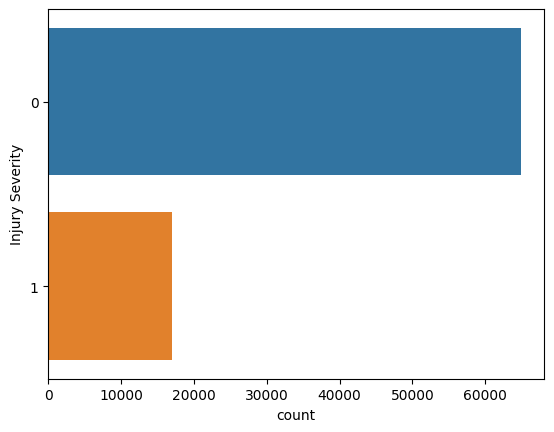

In [51]:
sns.countplot(y=df2['Injury Severity']);

In [52]:
# Dummifying the categorical columns
cols_to_dummy=df2.select_dtypes(include='object').columns
df2=pd.get_dummies(df2,columns=cols_to_dummy,drop_first=True,dtype='int')

In [53]:
# Let us check the dimensioanlity of the data
df2.shape

(81860, 220)

In [54]:
X = df2.drop("Injury Severity", axis=1)
y = df2["Injury Severity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Model Selection
- We opted for two tree based algorithms because we have many observations in our dataset, and these algorithms perform well in this case
- We selected RandomForest and Extreme Gradient Descent algorithms (XGBoost)

In [55]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)
print(classification_report(y_test, log_pred,target_names=['No Injury','Injury']))


/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

   No Injury       0.89      0.62      0.73     21338
      Injury       0.33      0.71      0.45      5676

    accuracy                           0.64     27014
   macro avg       0.61      0.66      0.59     27014
weighted avg       0.77      0.64      0.67     27014



In [56]:
# print coefficients and intercept for the top features in a dataframe
coef = pd.DataFrame(logreg.coef_.T, index=X_train.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)


,coef
Vehicle Damage Extent_SUPERFICIAL,-1.311944
Vehicle Damage Extent_FUNCTIONAL,-0.776321
Collision Type_SAME DIRECTION SIDESWIPE,-0.755322
Vehicle Second Impact Location_SIX OCLOCK,0.595412
Vehicle First Impact Location_SIX OCLOCK,0.580222
Driver At Fault_Yes,-0.530642
Collision Type_HEAD ON LEFT TURN,0.530315
Vehicle Damage Extent_NO DAMAGE,-0.516902
Vehicle Body Type_MOTORCYCLE,0.461010
Collision Type_SAME DIR REAR END,-0.453805


In [57]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',max_depth=5)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [58]:
importances = rf_model.feature_importances_

# Sorting and displaying feature importances
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)


Vehicle Damage Extent_SUPERFICIAL              0.193388
Vehicle Damage Extent_DISABLING                0.128157
Collision Type_SAME DIRECTION SIDESWIPE        0.101865
Driver At Fault_Yes                            0.051979
Vehicle Damage Extent_FUNCTIONAL               0.050282
                                                 ...   
Vehicle Body Type_AMBULANCE/EMERGENCY          0.000000
Vehicle Body Type_ALL TERRAIN VEHICLE (ATV)    0.000000
Traffic Control_RAILWAY CROSSING DEVICE        0.000000
Weather_BLOWING SNOW                           0.000000
Traffic Control_SCHOOL ZONE SIGN DEVICE        0.000000
Length: 219, dtype: float64


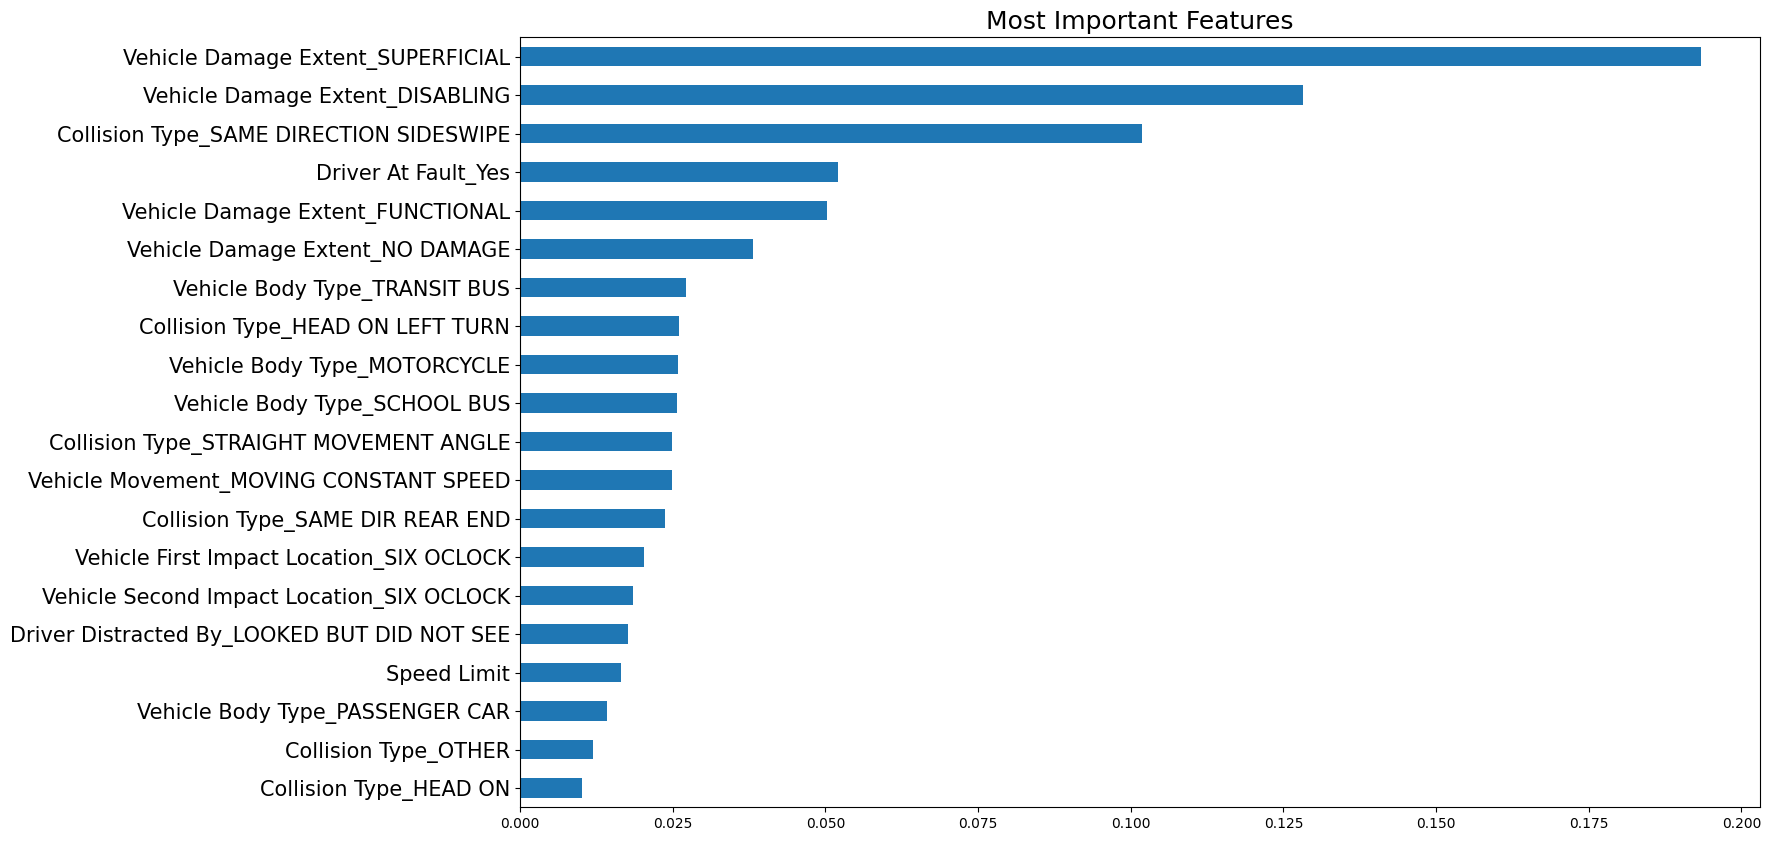

In [59]:
# Plotting the top features based on thier importance
(pd.Series(rf_model.feature_importances_, index=X.columns)
    .nlargest(20)  
    .plot(kind='barh', figsize=[16,10])
    .invert_yaxis()) 
plt.yticks(size=15)
plt.title('Most Important Features', size=18);

In [60]:
rfc_predictions=rf_model.predict(X_test)
print(classification_report(y_test,rfc_predictions,target_names=['No Injury','Injury']))

              precision    recall  f1-score   support

   No Injury       0.89      0.55      0.68     21338
      Injury       0.31      0.75      0.44      5676

    accuracy                           0.59     27014
   macro avg       0.60      0.65      0.56     27014
weighted avg       0.77      0.59      0.63     27014



In [61]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
#class_weights = y_train.value_counts().max() / y_train.value_counts()
#print(class_weights)
#sample_weights = y_train.map(class_weights)


In [62]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, max_depth=5, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, y_train)

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:364: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
xgb_predictions=xgb_model.predict(X_test)
print(classification_report(y_test,xgb_predictions,target_names=['No Injury','Injury']))    

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


              precision    recall  f1-score   support

   No Injury       0.90      0.63      0.74     21338
      Injury       0.34      0.72      0.47      5676

    accuracy                           0.65     27014
   macro avg       0.62      0.68      0.60     27014
weighted avg       0.78      0.65      0.68     27014



In [64]:

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

xgb_metrics = {metric_name: metric_func(y_test, xgb_predictions) for metric_name, metric_func in metrics.items()}
rfc_metrics = {metric_name: metric_func(y_test, rfc_predictions) for metric_name, metric_func in metrics.items()}
log_metrics = {metric_name: metric_func(y_test, log_pred) for metric_name, metric_func in metrics.items()}  # Added this

# Create dataframe
comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'Random Forest': rfc_metrics,
    'Logistic Regression': log_metrics  # Added this
})

print(comparison_df)



            XGBoost  Random Forest  Logistic Regression
Accuracy   0.650589       0.593470             0.636152
Precision  0.343117       0.308420             0.329641
Recall     0.724982       0.752467             0.707893
F1 Score   0.465788       0.437513             0.449818
ROC AUC    0.677891       0.651821             0.662481


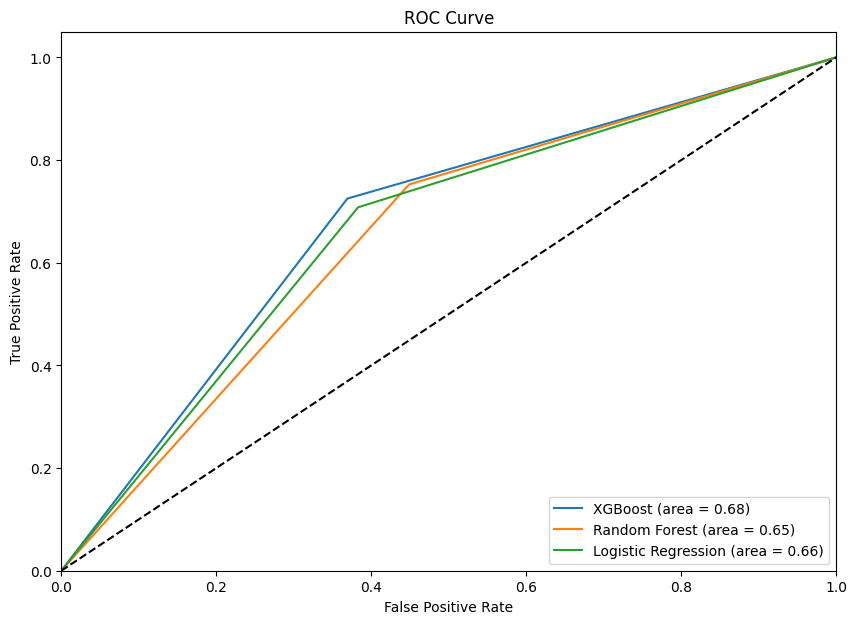

In [65]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_predictions)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_predictions)
fpr_log, tpr_log, _ = roc_curve(y_test, log_pred)

plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (area = {auc(fpr_xgb, tpr_xgb):.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (area = {auc(fpr_rfc, tpr_rfc):.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (area = {auc(fpr_log, tpr_log):.2f})')  # Corrected this line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Resampling Method to Improve Model Performance
- The model seem to be biased towards the positive class--that is, it is very sensitive to the positive class and correctly classifies it for the most part. However, it is also misclassifying many negative instances. While this may be beneficial in the sense that emergency units will be aptly dispatched to incidents that are most emergent, it may also lead to subobtimal allocations. 
- We  believe this problem is stemming from the weights we used to address class imbalance in the dataset. 
- To address this, we will try undersampling the negative class. This approach seems viable because we have a relatively large dataset; therefore, we can make do with losing some observations while also improving training speed and performance

In [66]:

df_minority = df2[df2['Injury Severity']==1]
df_majority = df2[df2['Injury Severity']==0]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=42) 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_downsampled['Injury Severity'].value_counts()


Injury Severity
1    17021
0    17021
Name: count, dtype: int64

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


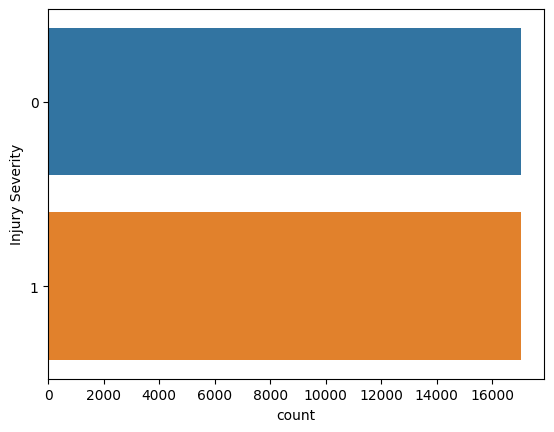

In [67]:
sns.countplot(y=df_downsampled['Injury Severity']);

In [68]:
X2 = df_downsampled.drop("Injury Severity", axis=1)
y2 = df_downsampled["Injury Severity"]
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [69]:
logreg_us = LogisticRegression()
logreg_us.fit(X_train_us, y_train_us)
log_pred_us = logreg_us.predict(X_test_us)
print(classification_report(y_test_us, log_pred_us,target_names=['No Injury','Injury']))


              precision    recall  f1-score   support

   No Injury       0.68      0.61      0.65      5700
      Injury       0.64      0.71      0.67      5534

    accuracy                           0.66     11234
   macro avg       0.66      0.66      0.66     11234
weighted avg       0.66      0.66      0.66     11234



/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
coef = pd.DataFrame(logreg_us.coef_.T, index=X_train_us.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)


,coef
Vehicle Damage Extent_SUPERFICIAL,-1.342010
Vehicle Damage Extent_FUNCTIONAL,-0.760674
Collision Type_SAME DIRECTION SIDESWIPE,-0.740048
Vehicle Second Impact Location_SIX OCLOCK,0.572918
Vehicle First Impact Location_SIX OCLOCK,0.565434
Collision Type_HEAD ON LEFT TURN,0.537075
Driver At Fault_Yes,-0.503987
Vehicle Damage Extent_NO DAMAGE,-0.493522
Vehicle Body Type_MOTORCYCLE,0.447985
Collision Type_HEAD ON,0.446016


In [71]:
# Creating and training the Random Forest model on undersampled data
rf_model_us = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=20)
rf_model_us.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=11, n_estimators=300, random_state=42)

In [72]:
# Feature Importance
feature_importances_us = pd.Series(rf_model_us.feature_importances_, index=X_train_us.columns).sort_values(ascending=False)
print(feature_importances_us)

Vehicle Damage Extent_SUPERFICIAL          0.127033
Vehicle Damage Extent_DISABLING            0.073143
Vehicle Damage Extent_FUNCTIONAL           0.050583
Collision Type_SAME DIRECTION SIDESWIPE    0.046926
Driver At Fault_Yes                        0.040626
                                             ...   
Route Type_Unknown                         0.000003
Equipment Problems_FACING WRONG WAY        0.000002
Equipment Problems_NOT STREPPED RIGHT      0.000000
Vehicle Body Type_FARM VEHICLE             0.000000
Vehicle Body Type_LIMOUSINE                0.000000
Length: 219, dtype: float64


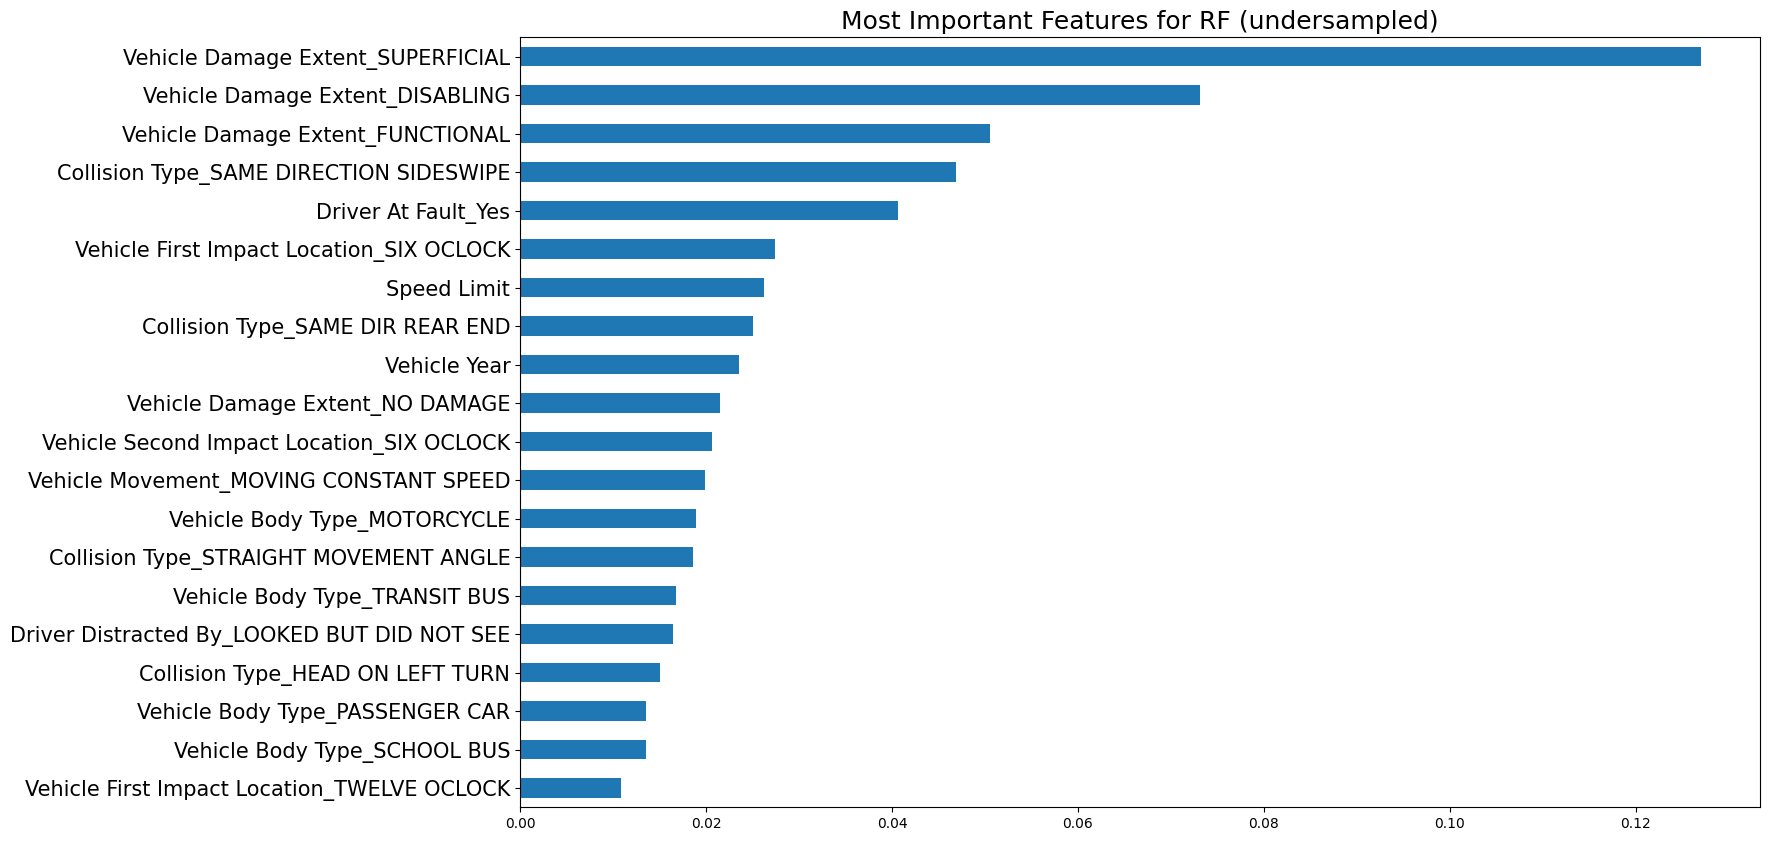

In [73]:
# Plot
feature_importances_us.nlargest(20).plot(kind='barh', figsize=[16,10]).invert_yaxis()
plt.yticks(size=15)
plt.title('Most Important Features for RF (undersampled)', size=18)
plt.show()

In [74]:
# Predictions
rfc_predictions_us = rf_model_us.predict(X_test_us)
print(classification_report(y_test_us, rfc_predictions_us,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.74      0.55      0.63      5700
      Injury       0.63      0.80      0.71      5534

    accuracy                           0.67     11234
   macro avg       0.69      0.68      0.67     11234
weighted avg       0.69      0.67      0.67     11234



In [82]:
# Creating and training the XGBoost model on undersampled data
xgb_model_us = XGBClassifier(n_estimators=450, random_state=42, max_depth=11)
xgb_model_us.fit(X_train_us, y_train_us)

# Predictions
xgb_predictions_us = xgb_model_us.predict(X_test_us)
print(classification_report(y_test_us, xgb_predictions_us, target_names=['No Injury', 'Injury']))

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:364: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


              precision    recall  f1-score   support

   No Injury       0.66      0.63      0.64      5700
      Injury       0.64      0.67      0.65      5534

    accuracy                           0.65     11234
   macro avg       0.65      0.65      0.65     11234
weighted avg       0.65      0.65      0.65     11234



In [76]:
# Metrics definition
metrics = {
    'Accuracy': accuracy_score,
    'Precision (Macro)': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall (Macro)': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
    'F1 Score (Macro)': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
}

# Metric Calculation Functions
def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}

# Calculate metrics
xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)

# Comparative Dataframe for organized presentation
comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us
})

print(comparison_df)



                    XGBoost  XGBoost (undersampled)  Random Forest  \
Accuracy           0.650589                0.646519       0.593470   
Precision (Macro)  0.619598                0.647215       0.600853   
Recall (Macro)     0.677891                0.646907       0.651821   
F1 Score (Macro)   0.603091                0.646422       0.559615   

                   Random Forest (undersampled)  Logistic Regression  \
Accuracy                               0.673580             0.636152   
Precision (Macro)                      0.685888             0.608902   
Recall (Macro)                         0.675378             0.662481   
F1 Score (Macro)                       0.669455             0.589010   

                   Logistic Regression (undersampled)  
Accuracy                                     0.658893  
Precision (Macro)                            0.660831  
Recall (Macro)                               0.659586  
F1 Score (Macro)                             0.658420  


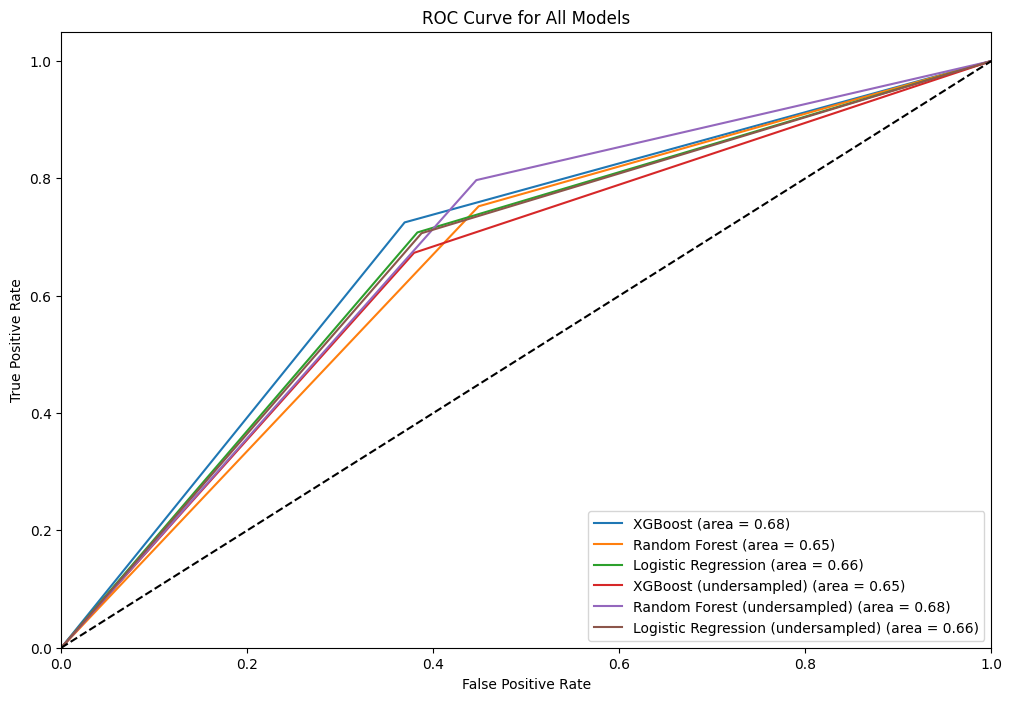

In [77]:
# ROC Curve calculations
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_predictions)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_predictions)
fpr_log, tpr_log, _ = roc_curve(y_test, log_pred)
fpr_xgb_us, tpr_xgb_us, _ = roc_curve(y_test_us, xgb_predictions_us)
fpr_rfc_us, tpr_rfc_us, _ = roc_curve(y_test_us, rfc_predictions_us)
fpr_log_us, tpr_log_us, _ = roc_curve(y_test_us, log_pred_us)

# Plot
plt.figure(figsize=(12, 8))

# Original models
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (area = {auc(fpr_xgb, tpr_xgb):.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (area = {auc(fpr_rfc, tpr_rfc):.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (area = {auc(fpr_log, tpr_log):.2f})')

# Undersampled models
plt.plot(fpr_xgb_us, tpr_xgb_us, label=f'XGBoost (undersampled) (area = {auc(fpr_xgb_us, tpr_xgb_us):.2f})')
plt.plot(fpr_rfc_us, tpr_rfc_us, label=f'Random Forest (undersampled) (area = {auc(fpr_rfc_us, tpr_rfc_us):.2f})')
plt.plot(fpr_log_us, tpr_log_us, label=f'Logistic Regression (undersampled) (area = {auc(fpr_log_us, tpr_log_us):.2f})')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc="lower right")
plt.show()


In [78]:
rf_parameters = {
    'n_estimators': [50,100, 200, 300, 400,450],
    'max_depth': [3, 5, 7, 9,11]
}

rfc = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rfc, rf_parameters, scoring='precision', cv=5, verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train_us, y_train_us)

# Best RF Model
best_rf = rf_grid_search.best_estimator_

# RF predictions
rf_preds = best_rf.predict(X_test_us)

print(classification_report(y_test_us, rf_preds))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
              precision    recall  f1-score   support

           0       0.74      0.55      0.63      5700
           1       0.63      0.80      0.71      5534

    accuracy                           0.67     11234
   macro avg       0.69      0.68      0.67     11234
weighted avg       0.69      0.67      0.67     11234



In [79]:
rf_grid_search.best_params_

{'max_depth': 11, 'n_estimators': 450}